In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import datetime as dt


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

In [2]:
##########################################################################################

In [3]:
# FX BASKET CROSSES DOWNLOAD #

In [4]:
import requests
#from bs4 import BeautifulSoup

# USD BASKET #
email = "your@email.com"
product_type = "currency_crosses"
time_frame = "Monthly"

names = ['AUD/USD','EUR/USD','GBP/USD','USD/JPY','USD/CHF','USD/CAD']
dict1={0:pd.DataFrame(),1:pd.DataFrame,2:pd.DataFrame(),3:pd.DataFrame(),4:pd.DataFrame(),5:pd.DataFrame()}

for x in range(len(dict1)):
    from_date = '01/01/1996'
    to_date = dt.datetime.now().strftime('%m/%d/%Y')
    name = names[x]
    params = {
        "email": email,
        "type": "historical_data",
        "product": product_type,
        "from_date": from_date,
        "to_date": to_date,
        "time_frame": time_frame,
        "name": name
    }

    response = requests.get("http://api.scraperlink.com/investpy/", params=params)
    data = response.json()
    dict1[x] = pd.DataFrame(data['data'])

for x in range(len(dict1)):
    dict1[x] = pd.DataFrame(dict1[x][['rowDateTimestamp','last_closeRaw','last_openRaw','last_maxRaw','last_minRaw']].copy())
    dict1[x].columns = ['Date',names[x]+' Close',names[x]+' Open',names[x]+' High',names[x]+' Low']
    dict1[x]['Date'] = pd.to_datetime(dict1[x]['Date'].str[:10])
    dict1[x] = dict1[x].set_index('Date')
    dict1[x] = dict1[x].astype(float).reset_index()

In [5]:
USD = dict1[0].merge(dict1[1], how = 'inner', on = 'Date').merge(dict1[2], how = 'inner', on = 'Date').merge(dict1[3], how = 'inner', on = 'Date').merge(dict1[4], how = 'inner', on = 'Date').merge(dict1[5], how = 'inner', on = 'Date')

In [6]:
# PLN BASKET #
email = "your@email.com"
product_type = "currency_crosses"
time_frame = "Monthly"

names = ['AUD/PLN','EUR/PLN','GBP/PLN','PLN/JPY','CHF/PLN','CAD/PLN','USD/PLN']
dict1={0:pd.DataFrame(),1:pd.DataFrame,2:pd.DataFrame(),3:pd.DataFrame(),4:pd.DataFrame(),5:pd.DataFrame(),6:pd.DataFrame()}

for x in range(len(dict1)):
    from_date = '01/01/1996'
    to_date = dt.datetime.now().strftime('%m/%d/%Y')
    name = names[x]
    params = {
        "email": email,
        "type": "historical_data",
        "product": product_type,
        "from_date": from_date,
        "to_date": to_date,
        "time_frame": time_frame,
        "name": name
    }

    response = requests.get("http://api.scraperlink.com/investpy/", params=params)
    data = response.json()
    dict1[x] = pd.DataFrame(data['data'])

for x in range(len(dict1)):
    dict1[x] = pd.DataFrame(dict1[x][['rowDateTimestamp','last_closeRaw','last_openRaw','last_maxRaw','last_minRaw']].copy())
    dict1[x].columns = ['Date',names[x]+' Close',names[x]+' Open',names[x]+' High',names[x]+' Low']
    dict1[x]['Date'] = pd.to_datetime(dict1[x]['Date'].str[:10])
    dict1[x] = dict1[x].set_index('Date')
    dict1[x] = dict1[x].astype(float).reset_index()

In [7]:
outliers = pd.DataFrame()
c = 5
checklist = [names[c]+' Open',names[c]+' High',names[c]+' Low',names[c]+' Close']


for y in range(len(checklist)):
    q1=dict1[c][checklist[y]].quantile(0.25)
    q3=dict1[c][checklist[y]].quantile(0.75)
    IQR=q3-q1
    outliers = pd.concat([outliers,dict1[c][((dict1[c][checklist[y]]<(q1-2*IQR)) | (dict1[c][checklist[y]]>(q3+2*IQR)))]],axis = 0)

outliers

,Date,CAD/PLN Close,CAD/PLN Open,CAD/PLN High,CAD/PLN Low
6,2022-08-01,3.5751,3.61585,3.71020,3.53375
319,1996-07-01,1.9688,1.96670,1.96880,1.96670
321,1996-05-01,1.9580,1.95580,1.95800,1.95580
322,1996-04-01,1.9554,1.95280,1.95540,1.95280
323,1996-03-01,1.9036,1.90140,1.90360,1.90140
324,1996-02-01,1.8677,1.86660,1.86770,1.86660
325,1996-01-01,1.8566,1.85520,1.85660,1.85520
323,1996-03-01,1.9036,1.90140,1.90360,1.90140
324,1996-02-01,1.8677,1.86660,1.86770,1.86660
325,1996-01-01,1.8566,1.85520,1.85660,1.85520


In [8]:
PLN = dict1[0].merge(dict1[1], how = 'inner', on = 'Date').merge(dict1[2], how = 'inner', on = 'Date').merge(dict1[3], how = 'inner', on = 'Date').merge(dict1[4], how = 'inner', on = 'Date').merge(dict1[5], how = 'inner', on = 'Date').merge(dict1[6], how = 'inner', on = 'Date')

In [9]:
# USD BASKET, BASE CURRENCY = USD
USD[['AUD/USD Close', 'AUD/USD Open', 'AUD/USD High', 'AUD/USD Low',
       'EUR/USD Close', 'EUR/USD Open', 'EUR/USD High', 'EUR/USD Low',
       'GBP/USD Close', 'GBP/USD Open', 'GBP/USD High', 'GBP/USD Low']] = 1/USD[['AUD/USD Close', 'AUD/USD Open', 'AUD/USD High', 'AUD/USD Low',
       'EUR/USD Close', 'EUR/USD Open', 'EUR/USD High', 'EUR/USD Low',
       'GBP/USD Close', 'GBP/USD Open', 'GBP/USD High', 'GBP/USD Low']]

In [10]:
# PLN BASKET, BASE CURRENCY = PLN
PLN[['AUD/PLN Close', 'AUD/PLN Open', 'AUD/PLN High', 'AUD/PLN Low',
       'EUR/PLN Close', 'EUR/PLN Open', 'EUR/PLN High', 'EUR/PLN Low',
       'GBP/PLN Close', 'GBP/PLN Open', 'GBP/PLN High', 'GBP/PLN Low','CHF/PLN Close', 'CHF/PLN Open', 'CHF/PLN High', 'CHF/PLN Low',
       'CAD/PLN Close', 'CAD/PLN Open', 'CAD/PLN High', 'CAD/PLN Low','USD/PLN Close','USD/PLN Open','USD/PLN High','USD/PLN Low']] = 1/PLN[['AUD/PLN Close', 'AUD/PLN Open', 'AUD/PLN High', 'AUD/PLN Low',
       'EUR/PLN Close', 'EUR/PLN Open', 'EUR/PLN High', 'EUR/PLN Low',
       'GBP/PLN Close', 'GBP/PLN Open', 'GBP/PLN High', 'GBP/PLN Low','CHF/PLN Close', 'CHF/PLN Open', 'CHF/PLN High', 'CHF/PLN Low',
       'CAD/PLN Close', 'CAD/PLN Open', 'CAD/PLN High', 'CAD/PLN Low','USD/PLN Close','USD/PLN Open','USD/PLN High','USD/PLN Low']]

In [11]:
# DROP MOST RECENT MONTH
USD = USD[1:].set_index('Date')
PLN = PLN[1:].set_index('Date')

In [12]:
# CHECK DATA MATCH, FULLY LOADED ALL DATA #
from datetime import *

if max(datetime.now().month-USD.index[0].month,datetime.now().month-PLN.index[0].month)>1:
    print('Check the data download dates. Shift the start date so the rows downloaded does not > 5000')
else:
    print('Good to go')

Good to go


In [13]:
##########################################################################################

In [14]:
# EQUAL WEIGHTING FX BASKET - PRICE INDEX #

In [15]:
# ASSIGNING WEIGHTS 
traits = ['Open','High', 'Low', 'Close']
fx = ['USD','PLN']
dict1={0:USD.copy(),1:PLN.copy()}

for x in range(len(dict1)):
    for y in range(len(traits)):
        dict1[x][fx[x]+' '+traits[y]] = np.nan 
        dict1[x][fx[x]+' '+traits[y]].iloc[0]= dict1[x][dict1[x].columns[dict1[x].columns.str.contains(traits[y], regex=True)]].mean(axis = 1).iloc[0]
        dict1[x][fx[x]+' '+traits[y]+' Return'] = (1+(dict1[x][dict1[x].columns[dict1[x].columns.str.contains(traits[y], regex=True)]]/dict1[x][dict1[x].columns[dict1[x].columns.str.contains(traits[y], regex=True)]].shift(1)-1).mean(axis = 1))
        dict1[x][fx[x]+' '+traits[y]].iloc[1] = dict1[x][fx[x]+' '+traits[y]].iloc[0]*dict1[x][fx[x]+' '+traits[y]+' Return'].iloc[1]
for x in range(len(dict1)):    
    dict1[x] = dict1[x][dict1[x].columns[-8:]]
for x in range(len(dict1)):
    for y in range(len(traits)):
        for a in range(len(dict1[x])-2):
            dict1[x][fx[x]+' '+traits[y]].iloc[a+2] = dict1[x][fx[x]+' '+traits[y]].iloc[a+1]*dict1[x][fx[x]+' '+traits[y]+' Return'].iloc[a+2]
    
for x in range(len(dict1)):    
    dict1[x] = dict1[x][dict1[x].columns[::2]]

In [16]:
USD_I = dict1[0].copy()
PLN_I = dict1[1].copy()

In [17]:
##########################################################################################

In [18]:
# 3M Yield, Trade Economic Releases
# Released 1 Month Delay

In [19]:
# FRED API
from fredapi import Fred
fred = Fred(api_key='YOUR-API-KEY')

In [20]:
# SHIFTING DATE 1M FOR INTEREST RATES, 3M FOR POLAND TRADE, 2M FOR USA TRADE
# ALL DATA POINTS ARE UPDATED ON THE 13th of EACH MONTH
# MODEL SHOULD BE RUN AT EOM
# FIRST SERIES, NO REVISIONS

# GETTING 3M YIELDS
pol_3m = fred.get_series_first_release('IR3TIB01PLM156N')
usa_3m = fred.get_series_first_release('IR3TIB01USM156N')

yields = pd.concat([pol_3m,usa_3m], axis = 1).reset_index()
yields['date'] = pd.to_datetime(yields['date']) + pd.DateOffset(months=1)

# GETTING TRADE BALANCE... not seasonal adjusted
# IN PLN
pol_import = fred.get_series_first_release('XTIMVA01PLM664N')
pol_export = fred.get_series_first_release('XTEXVA01PLM664N')
pol_net = fred.get_series_first_release('XTNTVA01PLM664N')

pol_trade = pd.concat([pol_import,pol_export,pol_net], axis = 1).reset_index()
pol_trade['date'] = pd.to_datetime(pol_trade['date']) + pd.DateOffset(months=3)

# IN USD
usa_import = fred.get_series_first_release('XTIMVA01USM664N')
usa_export = fred.get_series_first_release('XTEXVA01USM664N')
usa_net = fred.get_series_first_release('XTNTVA01USM664N')

usa_trade = pd.concat([usa_import,usa_export,usa_net], axis = 1).reset_index()
usa_trade['date'] = pd.to_datetime(usa_trade['date']) + pd.DateOffset(months=2)

In [21]:
# CONCAT ALL ECONOMIC INDICATORS
econ_ind = yields.merge(pol_trade.copy(),how = 'inner', on = 'date').merge(usa_trade.copy(),how = 'inner', on = 'date').dropna()
econ_ind = econ_ind.reset_index(drop = True)
econ_ind.columns = ['Date','PLN 3MY','USD 3MY','PLN Import','PLN Export','PLN Net','USD Import','USD Export','USD Net']

In [22]:
# TRADE DATA in MILLIONS
econ_ind[['PLN Import', 'PLN Export', 'PLN Net',
       'USD Import', 'USD Export', 'USD Net']] = econ_ind[['PLN Import', 'PLN Export', 'PLN Net',
       'USD Import', 'USD Export', 'USD Net']]/1000000

In [23]:
##########################################################################################

In [24]:
# Merging all into one DF
USDPLN = USD_I.copy().reset_index().merge(PLN_I.copy().reset_index(), how = 'inner', on = 'Date')
USDPLN = USDPLN.merge(econ_ind.copy(), how = 'inner', on = 'Date')

In [25]:
# ADDING USD/PLN BACK IN (OUTPUT)
email = "your@email.com"
product_type = "currency_crosses"
time_frame = "Monthly"

from_date = '01/01/1996'
to_date = dt.datetime.now().strftime('%m/%d/%Y')

params = {
    "email": email,
    "type": "historical_data",
    "product": product_type,
    "from_date": from_date,
    "to_date": to_date,
    "time_frame": time_frame,
    "name": 'USD/PLN'
}

response = requests.get("http://api.scraperlink.com/investpy/", params=params)
data = response.json()
usd_pln = pd.DataFrame(data['data'])

usd_pln = pd.DataFrame(usd_pln[['rowDateTimestamp','last_closeRaw','last_openRaw','last_maxRaw','last_minRaw']].copy())
usd_pln.columns = ['Date','USDPLN Close','USDPLN Open','USDPLN High','USDPLN Low']
usd_pln['Date'] = pd.to_datetime(usd_pln['Date'].str[:10])
usd_pln = usd_pln.set_index('Date')
usd_pln = usd_pln.astype(float).reset_index()

In [26]:
# MERGING FINAL DF
finaldf = usd_pln.merge(USDPLN.copy(), how = 'inner', on = 'Date')
finaldf = finaldf.sort_values(by = 'Date')

In [27]:
model_data = finaldf.set_index('Date').copy()

<AxesSubplot:xlabel='Date'>

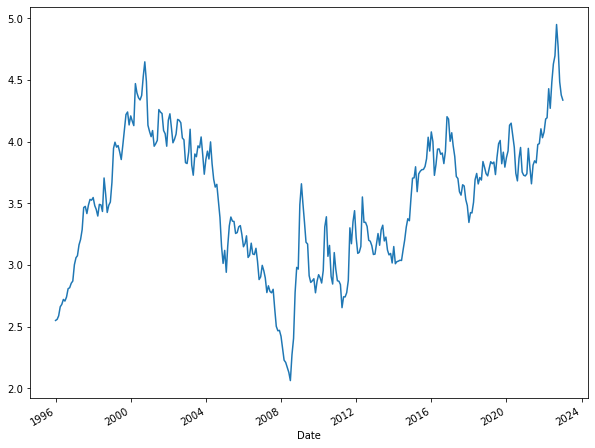

In [28]:
# PLOTTING USD/PLN
plt.figure(figsize=(10,8))
model_data['USDPLN Close'].plot()

In [29]:
# CORR BEFORE DIFFERENCING
model_data.corr()['USDPLN Close'].sort_values()

PLN Close      -0.703124
PLN High       -0.690543
PLN Low        -0.678386
PLN Open       -0.673625
USD Low         0.629477
USD Open        0.640475
USD Close       0.652783
USD High        0.660020
USDPLN Open     0.973630
USDPLN Low      0.986488
USDPLN High     0.990005
USDPLN Close    1.000000
Name: USDPLN Close, dtype: float64

<AxesSubplot:>

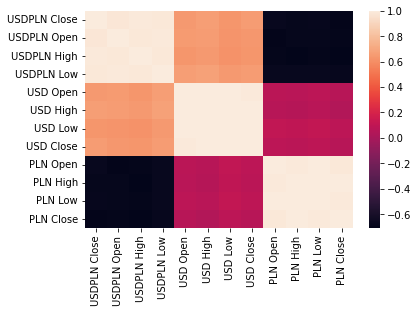

In [30]:
sns.heatmap(model_data.corr())

In [31]:
# CUTTING DOWN INPUTS
model_data = model_data[['USDPLN Close','USDPLN Open','USDPLN Low','USDPLN High',
            'PLN Close',
            'USD Close']].copy()

In [32]:
# Stationary Check
from statsmodels.tsa.stattools import adfuller

for x in range(len(model_data.columns)):
    adf_test = adfuller(model_data[model_data.columns[x]].dropna())
    print(str(model_data.columns[x])+' p-value: %f' %adf_test[1])

USDPLN Close p-value: 0.207589
USDPLN Open p-value: 0.191523
USDPLN Low p-value: 0.274443
USDPLN High p-value: 0.095290
PLN Close p-value: 0.026560
USD Close p-value: 0.571995


In [33]:
# DIFFERENCING + STATIONARITY CHECK
for x in range(len(model_data.columns)-1):
    model_data[model_data.columns[x+1]] = model_data[model_data.columns[x+1]].diff(1)
    adf_test = adfuller(model_data[model_data.columns[x+1]].dropna())
    print(str(model_data.columns[x+1])+' p-value: %f' %adf_test[1])

USDPLN Open p-value: 0.000000
USDPLN Low p-value: 0.000000
USDPLN High p-value: 0.000000
PLN Close p-value: 0.000000
USD Close p-value: 0.000000


In [34]:
#############################################

In [35]:
#model_data = data.copy().dropna()
model_data = model_data.copy().dropna()

In [36]:
def df_to_X_y_mv(df,window_size = 7):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [r for r in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size][0]
        y.append(label)
    return np.array(X), np.array(y)

WINDOW_SIZE = 7
X,y = df_to_X_y_mv(model_data, WINDOW_SIZE)
X.shape, y.shape

((316, 7, 6), (316,))

In [37]:
X_train, y_train = X[:225], y[:225]
X_val, y_val = X[225:270], y[225:270]
X_test, y_test = X[270:], y[270:]

training_mean = np.mean(X_train[:,:,0])
training_std = np.std(X_train[:,:,0])

def preprocess(X):
    X[:,:,0] = (X[:,:,0]- training_mean)/training_std

preprocess(X_train)
preprocess(X_val)
preprocess(X_test)

In [38]:
X_train.shape, y_train.shape,X_val.shape, y_val.shape,X_test.shape, y_test.shape

((225, 7, 6), (225,), (45, 7, 6), (45,), (46, 7, 6), (46,))

In [27]:
# LSTM
model0 = Sequential()
model0.add(InputLayer((7,6)))
model0.add(LSTM(64))
model0.add(Dense(32, 'relu'))
model0.add(Dense(1, 'linear'))

cp0 = ModelCheckpoint('model0/', save_best_only = True)
model0.compile(loss = MeanSquaredError(), optimizer = Adam(learning_rate=.0001), metrics = [RootMeanSquaredError()])
history = model0.fit(X_train, y_train, validation_data = (X_val,y_val), epochs = 2500, callbacks =[cp0])

Epoch 1/2500
1/8 [==>...........................] - ETA: 10s - loss: 11.3697 - root_mean_squared_error: 3.3719

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 5s 509ms/step - loss: 11.1633 - root_mean_squared_error: 3.3411 - val_loss: 13.2605 - val_root_mean_squared_error: 3.6415
Epoch 2/2500
1/8 [==>...........................] - ETA: 0s - loss: 11.0752 - root_mean_squared_error: 3.3279

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 489ms/step - loss: 10.9953 - root_mean_squared_error: 3.3159 - val_loss: 13.0966 - val_root_mean_squared_error: 3.6189
Epoch 3/2500
1/8 [==>...........................] - ETA: 0s - loss: 10.7388 - root_mean_squared_error: 3.2770

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 4s 540ms/step - loss: 10.8454 - root_mean_squared_error: 3.2932 - val_loss: 12.9396 - val_root_mean_squared_error: 3.5972
Epoch 4/2500
1/8 [==>...........................] - ETA: 0s - loss: 10.8260 - root_mean_squared_error: 3.2903

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 4s 523ms/step - loss: 10.7044 - root_mean_squared_error: 3.2718 - val_loss: 12.8047 - val_root_mean_squared_error: 3.5784
Epoch 5/2500
8/8 [==============================] - ETA: 0s - loss: 10.5639 - root_mean_squared_error: 3.2502

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 4s 540ms/step - loss: 10.5639 - root_mean_squared_error: 3.2502 - val_loss: 12.6770 - val_root_mean_squared_error: 3.5605
Epoch 6/2500
1/8 [==>...........................] - ETA: 0s - loss: 10.5050 - root_mean_squared_error: 3.2411

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 474ms/step - loss: 10.4277 - root_mean_squared_error: 3.2292 - val_loss: 12.5402 - val_root_mean_squared_error: 3.5412
Epoch 7/2500
1/8 [==>...........................] - ETA: 0s - loss: 10.7265 - root_mean_squared_error: 3.2751

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 4s 526ms/step - loss: 10.2881 - root_mean_squared_error: 3.2075 - val_loss: 12.3996 - val_root_mean_squared_error: 3.5213
Epoch 8/2500
1/8 [==>...........................] - ETA: 0s - loss: 10.6461 - root_mean_squared_error: 3.2628

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 462ms/step - loss: 10.1545 - root_mean_squared_error: 3.1866 - val_loss: 12.2432 - val_root_mean_squared_error: 3.4990
Epoch 9/2500
1/8 [==>...........................] - ETA: 0s - loss: 10.3266 - root_mean_squared_error: 3.2135

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 488ms/step - loss: 10.0083 - root_mean_squared_error: 3.1636 - val_loss: 12.0541 - val_root_mean_squared_error: 3.4719
Epoch 10/2500
1/8 [==>...........................] - ETA: 0s - loss: 9.3120 - root_mean_squared_error: 3.0516

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 4s 521ms/step - loss: 9.8476 - root_mean_squared_error: 3.1381 - val_loss: 11.8544 - val_root_mean_squared_error: 3.4430
Epoch 11/2500
1/8 [==>...........................] - ETA: 0s - loss: 9.5762 - root_mean_squared_error: 3.0945

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 474ms/step - loss: 9.6866 - root_mean_squared_error: 3.1123 - val_loss: 11.6599 - val_root_mean_squared_error: 3.4147
Epoch 12/2500
1/8 [==>...........................] - ETA: 0s - loss: 9.9923 - root_mean_squared_error: 3.1611

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 467ms/step - loss: 9.5176 - root_mean_squared_error: 3.0851 - val_loss: 11.4326 - val_root_mean_squared_error: 3.3812
Epoch 13/2500
1/8 [==>...........................] - ETA: 0s - loss: 8.5704 - root_mean_squared_error: 2.9275

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 4s 555ms/step - loss: 9.3353 - root_mean_squared_error: 3.0554 - val_loss: 11.2277 - val_root_mean_squared_error: 3.3508
Epoch 14/2500
1/8 [==>...........................] - ETA: 0s - loss: 9.3063 - root_mean_squared_error: 3.0506

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 483ms/step - loss: 9.1556 - root_mean_squared_error: 3.0258 - val_loss: 11.0227 - val_root_mean_squared_error: 3.3200
Epoch 15/2500
1/8 [==>...........................] - ETA: 0s - loss: 8.4882 - root_mean_squared_error: 2.9135

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 4s 524ms/step - loss: 8.9634 - root_mean_squared_error: 2.9939 - val_loss: 10.8067 - val_root_mean_squared_error: 3.2873
Epoch 16/2500
1/8 [==>...........................] - ETA: 0s - loss: 9.1775 - root_mean_squared_error: 3.0294

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 478ms/step - loss: 8.7584 - root_mean_squared_error: 2.9595 - val_loss: 10.5258 - val_root_mean_squared_error: 3.2443
Epoch 17/2500
1/8 [==>...........................] - ETA: 0s - loss: 8.7740 - root_mean_squared_error: 2.9621

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 462ms/step - loss: 8.5326 - root_mean_squared_error: 2.9211 - val_loss: 10.2260 - val_root_mean_squared_error: 3.1978
Epoch 18/2500
1/8 [==>...........................] - ETA: 0s - loss: 8.3663 - root_mean_squared_error: 2.8925

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 4s 514ms/step - loss: 8.3084 - root_mean_squared_error: 2.8824 - val_loss: 9.9445 - val_root_mean_squared_error: 3.1535
Epoch 19/2500
1/8 [==>...........................] - ETA: 0s - loss: 8.2721 - root_mean_squared_error: 2.8761

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 450ms/step - loss: 8.0761 - root_mean_squared_error: 2.8419 - val_loss: 9.6615 - val_root_mean_squared_error: 3.1083
Epoch 20/2500
1/8 [==>...........................] - ETA: 0s - loss: 8.6055 - root_mean_squared_error: 2.9335

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 455ms/step - loss: 7.8336 - root_mean_squared_error: 2.7989 - val_loss: 9.3358 - val_root_mean_squared_error: 3.0555
Epoch 21/2500
1/8 [==>...........................] - ETA: 0s - loss: 7.7488 - root_mean_squared_error: 2.7837

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 497ms/step - loss: 7.5763 - root_mean_squared_error: 2.7525 - val_loss: 8.9794 - val_root_mean_squared_error: 2.9966
Epoch 22/2500
1/8 [==>...........................] - ETA: 0s - loss: 7.3106 - root_mean_squared_error: 2.7038

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 446ms/step - loss: 7.3007 - root_mean_squared_error: 2.7020 - val_loss: 8.5855 - val_root_mean_squared_error: 2.9301
Epoch 23/2500
1/8 [==>...........................] - ETA: 0s - loss: 6.8793 - root_mean_squared_error: 2.6228

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 449ms/step - loss: 7.0115 - root_mean_squared_error: 2.6479 - val_loss: 8.2070 - val_root_mean_squared_error: 2.8648
Epoch 24/2500
1/8 [==>...........................] - ETA: 0s - loss: 6.2463 - root_mean_squared_error: 2.4993

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 498ms/step - loss: 6.7137 - root_mean_squared_error: 2.5911 - val_loss: 7.7966 - val_root_mean_squared_error: 2.7922
Epoch 25/2500
1/8 [==>...........................] - ETA: 0s - loss: 6.8560 - root_mean_squared_error: 2.6184

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 462ms/step - loss: 6.4130 - root_mean_squared_error: 2.5324 - val_loss: 7.3499 - val_root_mean_squared_error: 2.7111
Epoch 26/2500
1/8 [==>...........................] - ETA: 0s - loss: 6.1759 - root_mean_squared_error: 2.4851

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 448ms/step - loss: 6.0848 - root_mean_squared_error: 2.4667 - val_loss: 6.8588 - val_root_mean_squared_error: 2.6189
Epoch 27/2500
1/8 [==>...........................] - ETA: 0s - loss: 6.1314 - root_mean_squared_error: 2.4762

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 4s 506ms/step - loss: 5.7530 - root_mean_squared_error: 2.3985 - val_loss: 6.4087 - val_root_mean_squared_error: 2.5315
Epoch 28/2500
1/8 [==>...........................] - ETA: 0s - loss: 5.4796 - root_mean_squared_error: 2.3409

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 481ms/step - loss: 5.4230 - root_mean_squared_error: 2.3287 - val_loss: 5.9813 - val_root_mean_squared_error: 2.4457
Epoch 29/2500
1/8 [==>...........................] - ETA: 0s - loss: 5.6126 - root_mean_squared_error: 2.3691

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 490ms/step - loss: 5.0916 - root_mean_squared_error: 2.2565 - val_loss: 5.5642 - val_root_mean_squared_error: 2.3589
Epoch 30/2500
1/8 [==>...........................] - ETA: 0s - loss: 4.6887 - root_mean_squared_error: 2.1653

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 4s 521ms/step - loss: 4.7572 - root_mean_squared_error: 2.1811 - val_loss: 5.1463 - val_root_mean_squared_error: 2.2685
Epoch 31/2500
1/8 [==>...........................] - ETA: 0s - loss: 4.9253 - root_mean_squared_error: 2.2193

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 490ms/step - loss: 4.4232 - root_mean_squared_error: 2.1031 - val_loss: 4.6879 - val_root_mean_squared_error: 2.1652
Epoch 32/2500
1/8 [==>...........................] - ETA: 0s - loss: 5.2949 - root_mean_squared_error: 2.3011

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 4s 512ms/step - loss: 4.1015 - root_mean_squared_error: 2.0252 - val_loss: 4.2987 - val_root_mean_squared_error: 2.0733
Epoch 33/2500
1/8 [==>...........................] - ETA: 0s - loss: 4.3595 - root_mean_squared_error: 2.0879

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 445ms/step - loss: 3.7986 - root_mean_squared_error: 1.9490 - val_loss: 3.9510 - val_root_mean_squared_error: 1.9877
Epoch 34/2500
1/8 [==>...........................] - ETA: 0s - loss: 3.4936 - root_mean_squared_error: 1.8691

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 450ms/step - loss: 3.5149 - root_mean_squared_error: 1.8748 - val_loss: 3.6262 - val_root_mean_squared_error: 1.9043
Epoch 35/2500
1/8 [==>...........................] - ETA: 0s - loss: 3.6077 - root_mean_squared_error: 1.8994

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 490ms/step - loss: 3.2439 - root_mean_squared_error: 1.8011 - val_loss: 3.3090 - val_root_mean_squared_error: 1.8191
Epoch 36/2500
6/8 [=====================>........] - ETA: 0s - loss: 3.0375 - root_mean_squared_error: 1.7428

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 460ms/step - loss: 2.9966 - root_mean_squared_error: 1.7311 - val_loss: 3.0082 - val_root_mean_squared_error: 1.7344
Epoch 37/2500
1/8 [==>...........................] - ETA: 0s - loss: 3.6837 - root_mean_squared_error: 1.9193

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 462ms/step - loss: 2.7666 - root_mean_squared_error: 1.6633 - val_loss: 2.7900 - val_root_mean_squared_error: 1.6703
Epoch 38/2500
1/8 [==>...........................] - ETA: 0s - loss: 2.9006 - root_mean_squared_error: 1.7031

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 4s 507ms/step - loss: 2.5508 - root_mean_squared_error: 1.5971 - val_loss: 2.6267 - val_root_mean_squared_error: 1.6207
Epoch 39/2500
1/8 [==>...........................] - ETA: 0s - loss: 2.9811 - root_mean_squared_error: 1.7266

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 455ms/step - loss: 2.3560 - root_mean_squared_error: 1.5349 - val_loss: 2.4849 - val_root_mean_squared_error: 1.5764
Epoch 40/2500
1/8 [==>...........................] - ETA: 0s - loss: 2.7672 - root_mean_squared_error: 1.6635

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 481ms/step - loss: 2.2005 - root_mean_squared_error: 1.4834 - val_loss: 2.3611 - val_root_mean_squared_error: 1.5366
Epoch 41/2500
1/8 [==>...........................] - ETA: 0s - loss: 1.7335 - root_mean_squared_error: 1.3166

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 4s 514ms/step - loss: 2.0735 - root_mean_squared_error: 1.4400 - val_loss: 2.2614 - val_root_mean_squared_error: 1.5038
Epoch 42/2500
1/8 [==>...........................] - ETA: 0s - loss: 1.7068 - root_mean_squared_error: 1.3064

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 436ms/step - loss: 1.9639 - root_mean_squared_error: 1.4014 - val_loss: 2.1709 - val_root_mean_squared_error: 1.4734
Epoch 43/2500
1/8 [==>...........................] - ETA: 0s - loss: 1.6340 - root_mean_squared_error: 1.2783

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 472ms/step - loss: 1.8675 - root_mean_squared_error: 1.3665 - val_loss: 2.1004 - val_root_mean_squared_error: 1.4493
Epoch 44/2500
1/8 [==>...........................] - ETA: 0s - loss: 1.9410 - root_mean_squared_error: 1.3932

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 459ms/step - loss: 1.7790 - root_mean_squared_error: 1.3338 - val_loss: 2.0369 - val_root_mean_squared_error: 1.4272
Epoch 45/2500
1/8 [==>...........................] - ETA: 0s - loss: 2.1881 - root_mean_squared_error: 1.4792

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 450ms/step - loss: 1.7046 - root_mean_squared_error: 1.3056 - val_loss: 1.9290 - val_root_mean_squared_error: 1.3889
Epoch 46/2500
1/8 [==>...........................] - ETA: 0s - loss: 1.2490 - root_mean_squared_error: 1.1176

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 4s 510ms/step - loss: 1.6456 - root_mean_squared_error: 1.2828 - val_loss: 1.8721 - val_root_mean_squared_error: 1.3682
Epoch 47/2500
1/8 [==>...........................] - ETA: 0s - loss: 1.0416 - root_mean_squared_error: 1.0206

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 466ms/step - loss: 1.5970 - root_mean_squared_error: 1.2637 - val_loss: 1.8514 - val_root_mean_squared_error: 1.3607
Epoch 48/2500
1/8 [==>...........................] - ETA: 0s - loss: 1.1549 - root_mean_squared_error: 1.0747

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 445ms/step - loss: 1.5581 - root_mean_squared_error: 1.2483 - val_loss: 1.8420 - val_root_mean_squared_error: 1.3572
Epoch 49/2500
1/8 [==>...........................] - ETA: 0s - loss: 1.2382 - root_mean_squared_error: 1.1127

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 4s 503ms/step - loss: 1.5258 - root_mean_squared_error: 1.2353 - val_loss: 1.8353 - val_root_mean_squared_error: 1.3547
Epoch 50/2500
1/8 [==>...........................] - ETA: 0s - loss: 1.8927 - root_mean_squared_error: 1.3757

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 467ms/step - loss: 1.4939 - root_mean_squared_error: 1.2223 - val_loss: 1.8157 - val_root_mean_squared_error: 1.3475
Epoch 51/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.8793 - root_mean_squared_error: 0.9377

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 462ms/step - loss: 1.4667 - root_mean_squared_error: 1.2111 - val_loss: 1.7550 - val_root_mean_squared_error: 1.3248
Epoch 52/2500
1/8 [==>...........................] - ETA: 0s - loss: 1.0083 - root_mean_squared_error: 1.0041

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 479ms/step - loss: 1.4413 - root_mean_squared_error: 1.2006 - val_loss: 1.7201 - val_root_mean_squared_error: 1.3115
Epoch 53/2500
1/8 [==>...........................] - ETA: 0s - loss: 1.5702 - root_mean_squared_error: 1.2531

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 462ms/step - loss: 1.4181 - root_mean_squared_error: 1.1909 - val_loss: 1.6970 - val_root_mean_squared_error: 1.3027
Epoch 54/2500
1/8 [==>...........................] - ETA: 0s - loss: 1.4647 - root_mean_squared_error: 1.2102

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 431ms/step - loss: 1.3947 - root_mean_squared_error: 1.1810 - val_loss: 1.6836 - val_root_mean_squared_error: 1.2975
Epoch 55/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.9965 - root_mean_squared_error: 0.9983

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 4s 498ms/step - loss: 1.3727 - root_mean_squared_error: 1.1716 - val_loss: 1.6778 - val_root_mean_squared_error: 1.2953
Epoch 56/2500
1/8 [==>...........................] - ETA: 0s - loss: 1.3351 - root_mean_squared_error: 1.1555

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 469ms/step - loss: 1.3494 - root_mean_squared_error: 1.1617 - val_loss: 1.6174 - val_root_mean_squared_error: 1.2718
Epoch 57/2500
1/8 [==>...........................] - ETA: 0s - loss: 1.3743 - root_mean_squared_error: 1.1723

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 483ms/step - loss: 1.3252 - root_mean_squared_error: 1.1512 - val_loss: 1.5963 - val_root_mean_squared_error: 1.2634
Epoch 58/2500
1/8 [==>...........................] - ETA: 0s - loss: 1.3761 - root_mean_squared_error: 1.1731

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 464ms/step - loss: 1.3003 - root_mean_squared_error: 1.1403 - val_loss: 1.5847 - val_root_mean_squared_error: 1.2589
Epoch 59/2500
1/8 [==>...........................] - ETA: 0s - loss: 1.5379 - root_mean_squared_error: 1.2401

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 433ms/step - loss: 1.2782 - root_mean_squared_error: 1.1306 - val_loss: 1.5783 - val_root_mean_squared_error: 1.2563
Epoch 60/2500
1/8 [==>...........................] - ETA: 0s - loss: 1.0177 - root_mean_squared_error: 1.0088

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 479ms/step - loss: 1.2554 - root_mean_squared_error: 1.1204 - val_loss: 1.5174 - val_root_mean_squared_error: 1.2318
Epoch 61/2500
1/8 [==>...........................] - ETA: 0s - loss: 1.0970 - root_mean_squared_error: 1.0474

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 430ms/step - loss: 1.2304 - root_mean_squared_error: 1.1092 - val_loss: 1.4806 - val_root_mean_squared_error: 1.2168
Epoch 62/2500
1/8 [==>...........................] - ETA: 0s - loss: 1.1358 - root_mean_squared_error: 1.0657

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 451ms/step - loss: 1.2087 - root_mean_squared_error: 1.0994 - val_loss: 1.4582 - val_root_mean_squared_error: 1.2076
Epoch 63/2500
1/8 [==>...........................] - ETA: 0s - loss: 1.3863 - root_mean_squared_error: 1.1774

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 4s 503ms/step - loss: 1.1885 - root_mean_squared_error: 1.0902 - val_loss: 1.4401 - val_root_mean_squared_error: 1.2001
Epoch 64/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.6435 - root_mean_squared_error: 0.8022

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 471ms/step - loss: 1.1705 - root_mean_squared_error: 1.0819 - val_loss: 1.4244 - val_root_mean_squared_error: 1.1935
Epoch 65/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.4832 - root_mean_squared_error: 0.6951

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 455ms/step - loss: 1.1524 - root_mean_squared_error: 1.0735 - val_loss: 1.4178 - val_root_mean_squared_error: 1.1907
Epoch 66/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.8363 - root_mean_squared_error: 0.9145

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 486ms/step - loss: 1.1335 - root_mean_squared_error: 1.0647 - val_loss: 1.4144 - val_root_mean_squared_error: 1.1893
Epoch 67/2500
1/8 [==>...........................] - ETA: 0s - loss: 1.0260 - root_mean_squared_error: 1.0129

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 448ms/step - loss: 1.1108 - root_mean_squared_error: 1.0540 - val_loss: 1.4110 - val_root_mean_squared_error: 1.1878
Epoch 68/2500
1/8 [==>...........................] - ETA: 0s - loss: 1.0261 - root_mean_squared_error: 1.0129

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 432ms/step - loss: 1.0900 - root_mean_squared_error: 1.0440 - val_loss: 1.3973 - val_root_mean_squared_error: 1.1821
Epoch 69/2500
1/8 [==>...........................] - ETA: 0s - loss: 1.4902 - root_mean_squared_error: 1.2207

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 478ms/step - loss: 1.0702 - root_mean_squared_error: 1.0345 - val_loss: 1.3873 - val_root_mean_squared_error: 1.1779
Epoch 70/2500
1/8 [==>...........................] - ETA: 0s - loss: 1.3978 - root_mean_squared_error: 1.1823

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 452ms/step - loss: 1.0508 - root_mean_squared_error: 1.0251 - val_loss: 1.3735 - val_root_mean_squared_error: 1.1720
Epoch 71/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.8878 - root_mean_squared_error: 0.9422

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 448ms/step - loss: 1.0327 - root_mean_squared_error: 1.0162 - val_loss: 1.3684 - val_root_mean_squared_error: 1.1698
Epoch 72/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.9185 - root_mean_squared_error: 0.9584

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 4s 526ms/step - loss: 1.0154 - root_mean_squared_error: 1.0077 - val_loss: 1.3504 - val_root_mean_squared_error: 1.1621
Epoch 73/2500
1/8 [==>...........................] - ETA: 0s - loss: 1.0111 - root_mean_squared_error: 1.0055

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 464ms/step - loss: 0.9993 - root_mean_squared_error: 0.9997 - val_loss: 1.3290 - val_root_mean_squared_error: 1.1528
Epoch 74/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.7068 - root_mean_squared_error: 0.8407

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 498ms/step - loss: 0.9841 - root_mean_squared_error: 0.9920 - val_loss: 1.3077 - val_root_mean_squared_error: 1.1435
Epoch 75/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.6846 - root_mean_squared_error: 0.8274

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 434ms/step - loss: 0.9686 - root_mean_squared_error: 0.9842 - val_loss: 1.2838 - val_root_mean_squared_error: 1.1331
Epoch 76/2500
1/8 [==>...........................] - ETA: 0s - loss: 1.0333 - root_mean_squared_error: 1.0165

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 428ms/step - loss: 0.9530 - root_mean_squared_error: 0.9762 - val_loss: 1.2640 - val_root_mean_squared_error: 1.1243
Epoch 77/2500
1/8 [==>...........................] - ETA: 0s - loss: 1.2035 - root_mean_squared_error: 1.0971

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 4s 505ms/step - loss: 0.9371 - root_mean_squared_error: 0.9680 - val_loss: 1.2477 - val_root_mean_squared_error: 1.1170
Epoch 78/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.9024 - root_mean_squared_error: 0.9499

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 452ms/step - loss: 0.9220 - root_mean_squared_error: 0.9602 - val_loss: 1.2276 - val_root_mean_squared_error: 1.1080
Epoch 79/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.9003 - root_mean_squared_error: 0.9489

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 457ms/step - loss: 0.9062 - root_mean_squared_error: 0.9519 - val_loss: 1.2112 - val_root_mean_squared_error: 1.1006
Epoch 80/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.7994 - root_mean_squared_error: 0.8941

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 4s 519ms/step - loss: 0.8915 - root_mean_squared_error: 0.9442 - val_loss: 1.1924 - val_root_mean_squared_error: 1.0920
Epoch 81/2500
1/8 [==>...........................] - ETA: 0s - loss: 1.0765 - root_mean_squared_error: 1.0376

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 464ms/step - loss: 0.8764 - root_mean_squared_error: 0.9361 - val_loss: 1.1726 - val_root_mean_squared_error: 1.0829
Epoch 82/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.6294 - root_mean_squared_error: 0.7933

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 460ms/step - loss: 0.8604 - root_mean_squared_error: 0.9276 - val_loss: 1.1628 - val_root_mean_squared_error: 1.0783
Epoch 83/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.7611 - root_mean_squared_error: 0.8724

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 495ms/step - loss: 0.8427 - root_mean_squared_error: 0.9180 - val_loss: 1.1558 - val_root_mean_squared_error: 1.0751
Epoch 84/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.7275 - root_mean_squared_error: 0.8529

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 466ms/step - loss: 0.8271 - root_mean_squared_error: 0.9095 - val_loss: 1.1404 - val_root_mean_squared_error: 1.0679
Epoch 85/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.7668 - root_mean_squared_error: 0.8757

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 477ms/step - loss: 0.8096 - root_mean_squared_error: 0.8998 - val_loss: 1.1213 - val_root_mean_squared_error: 1.0589
Epoch 86/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.6338 - root_mean_squared_error: 0.7961

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 469ms/step - loss: 0.7942 - root_mean_squared_error: 0.8912 - val_loss: 1.0942 - val_root_mean_squared_error: 1.0460
Epoch 87/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.6586 - root_mean_squared_error: 0.8115

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 429ms/step - loss: 0.7783 - root_mean_squared_error: 0.8822 - val_loss: 1.0419 - val_root_mean_squared_error: 1.0207
Epoch 88/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.9741 - root_mean_squared_error: 0.9870

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 476ms/step - loss: 0.7619 - root_mean_squared_error: 0.8729 - val_loss: 1.0118 - val_root_mean_squared_error: 1.0059
Epoch 89/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.6565 - root_mean_squared_error: 0.8102

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 448ms/step - loss: 0.7477 - root_mean_squared_error: 0.8647 - val_loss: 0.9921 - val_root_mean_squared_error: 0.9961
Epoch 90/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.5861 - root_mean_squared_error: 0.7656

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 462ms/step - loss: 0.7323 - root_mean_squared_error: 0.8558 - val_loss: 0.9764 - val_root_mean_squared_error: 0.9881
Epoch 91/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.7169 - root_mean_squared_error: 0.8467

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 474ms/step - loss: 0.7194 - root_mean_squared_error: 0.8482 - val_loss: 0.9503 - val_root_mean_squared_error: 0.9748
Epoch 92/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.8497 - root_mean_squared_error: 0.9218

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 448ms/step - loss: 0.7035 - root_mean_squared_error: 0.8387 - val_loss: 0.8911 - val_root_mean_squared_error: 0.9440
Epoch 93/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.3575 - root_mean_squared_error: 0.5979

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 462ms/step - loss: 0.6847 - root_mean_squared_error: 0.8275 - val_loss: 0.8644 - val_root_mean_squared_error: 0.9298
Epoch 94/2500
1/8 [==>...........................] - ETA: 0s - loss: 1.0597 - root_mean_squared_error: 1.0294

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 495ms/step - loss: 0.6692 - root_mean_squared_error: 0.8181 - val_loss: 0.8438 - val_root_mean_squared_error: 0.9186
Epoch 95/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.9089 - root_mean_squared_error: 0.9534

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 450ms/step - loss: 0.6551 - root_mean_squared_error: 0.8094 - val_loss: 0.8215 - val_root_mean_squared_error: 0.9063
Epoch 96/2500
1/8 [==>...........................] - ETA: 0s - loss: 1.1757 - root_mean_squared_error: 1.0843

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 438ms/step - loss: 0.6402 - root_mean_squared_error: 0.8001 - val_loss: 0.8050 - val_root_mean_squared_error: 0.8972
Epoch 97/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.9247 - root_mean_squared_error: 0.9616

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 488ms/step - loss: 0.6275 - root_mean_squared_error: 0.7921 - val_loss: 0.7960 - val_root_mean_squared_error: 0.8922
Epoch 98/2500
8/8 [==============================] - 0s 10ms/step - loss: 0.6140 - root_mean_squared_error: 0.7836 - val_loss: 0.8010 - val_root_mean_squared_error: 0.8950
Epoch 99/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.4621 - root_mean_squared_error: 0.6798

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 464ms/step - loss: 0.6017 - root_mean_squared_error: 0.7757 - val_loss: 0.7910 - val_root_mean_squared_error: 0.8894
Epoch 100/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.5242 - root_mean_squared_error: 0.7240

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 4s 512ms/step - loss: 0.5897 - root_mean_squared_error: 0.7679 - val_loss: 0.7829 - val_root_mean_squared_error: 0.8848
Epoch 101/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.5583 - root_mean_squared_error: 0.7472

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 445ms/step - loss: 0.5783 - root_mean_squared_error: 0.7605 - val_loss: 0.7651 - val_root_mean_squared_error: 0.8747
Epoch 102/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.3072 - root_mean_squared_error: 0.5543

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 464ms/step - loss: 0.5659 - root_mean_squared_error: 0.7522 - val_loss: 0.7476 - val_root_mean_squared_error: 0.8646
Epoch 103/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.5891 - root_mean_squared_error: 0.7675

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 4s 502ms/step - loss: 0.5540 - root_mean_squared_error: 0.7443 - val_loss: 0.7272 - val_root_mean_squared_error: 0.8528
Epoch 104/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.8648 - root_mean_squared_error: 0.9299

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 448ms/step - loss: 0.5417 - root_mean_squared_error: 0.7360 - val_loss: 0.7040 - val_root_mean_squared_error: 0.8390
Epoch 105/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.5250 - root_mean_squared_error: 0.7246

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 429ms/step - loss: 0.5273 - root_mean_squared_error: 0.7261 - val_loss: 0.6841 - val_root_mean_squared_error: 0.8271
Epoch 106/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.5688 - root_mean_squared_error: 0.7542

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 479ms/step - loss: 0.5123 - root_mean_squared_error: 0.7157 - val_loss: 0.6716 - val_root_mean_squared_error: 0.8195
Epoch 107/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.4116 - root_mean_squared_error: 0.6415

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 455ms/step - loss: 0.4972 - root_mean_squared_error: 0.7051 - val_loss: 0.6549 - val_root_mean_squared_error: 0.8093
Epoch 108/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.5627 - root_mean_squared_error: 0.7501

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 481ms/step - loss: 0.4848 - root_mean_squared_error: 0.6963 - val_loss: 0.6415 - val_root_mean_squared_error: 0.8009
Epoch 109/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.4854 - root_mean_squared_error: 0.6967

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 4s 507ms/step - loss: 0.4736 - root_mean_squared_error: 0.6882 - val_loss: 0.6211 - val_root_mean_squared_error: 0.7881
Epoch 110/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.3299 - root_mean_squared_error: 0.5744

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 460ms/step - loss: 0.4555 - root_mean_squared_error: 0.6749 - val_loss: 0.6005 - val_root_mean_squared_error: 0.7749
Epoch 111/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.3145 - root_mean_squared_error: 0.5608

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 438ms/step - loss: 0.4398 - root_mean_squared_error: 0.6632 - val_loss: 0.5813 - val_root_mean_squared_error: 0.7624
Epoch 112/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.2433 - root_mean_squared_error: 0.4933

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 4s 524ms/step - loss: 0.4262 - root_mean_squared_error: 0.6529 - val_loss: 0.5689 - val_root_mean_squared_error: 0.7542
Epoch 113/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.8161 - root_mean_squared_error: 0.9034

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 462ms/step - loss: 0.4133 - root_mean_squared_error: 0.6429 - val_loss: 0.5548 - val_root_mean_squared_error: 0.7449
Epoch 114/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.3373 - root_mean_squared_error: 0.5808

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 460ms/step - loss: 0.4003 - root_mean_squared_error: 0.6327 - val_loss: 0.5386 - val_root_mean_squared_error: 0.7339
Epoch 115/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.4743 - root_mean_squared_error: 0.6887

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 498ms/step - loss: 0.3888 - root_mean_squared_error: 0.6235 - val_loss: 0.5172 - val_root_mean_squared_error: 0.7192
Epoch 116/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.4664 - root_mean_squared_error: 0.6829

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 465ms/step - loss: 0.3751 - root_mean_squared_error: 0.6125 - val_loss: 0.4702 - val_root_mean_squared_error: 0.6857
Epoch 117/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.4419 - root_mean_squared_error: 0.6648

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 4s 577ms/step - loss: 0.3555 - root_mean_squared_error: 0.5963 - val_loss: 0.4389 - val_root_mean_squared_error: 0.6625
Epoch 118/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.4103 - root_mean_squared_error: 0.6405

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 4s 574ms/step - loss: 0.3374 - root_mean_squared_error: 0.5808 - val_loss: 0.3986 - val_root_mean_squared_error: 0.6314
Epoch 119/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.1233 - root_mean_squared_error: 0.3511

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 498ms/step - loss: 0.3166 - root_mean_squared_error: 0.5627 - val_loss: 0.3724 - val_root_mean_squared_error: 0.6102
Epoch 120/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.2722 - root_mean_squared_error: 0.5217

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 4s 502ms/step - loss: 0.3030 - root_mean_squared_error: 0.5505 - val_loss: 0.3536 - val_root_mean_squared_error: 0.5947
Epoch 121/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.2439 - root_mean_squared_error: 0.4939

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 453ms/step - loss: 0.2903 - root_mean_squared_error: 0.5388 - val_loss: 0.3389 - val_root_mean_squared_error: 0.5821
Epoch 122/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.3026 - root_mean_squared_error: 0.5501

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 479ms/step - loss: 0.2792 - root_mean_squared_error: 0.5284 - val_loss: 0.3255 - val_root_mean_squared_error: 0.5705
Epoch 123/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.4638 - root_mean_squared_error: 0.6810

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 4s 505ms/step - loss: 0.2706 - root_mean_squared_error: 0.5202 - val_loss: 0.3113 - val_root_mean_squared_error: 0.5579
Epoch 124/2500
8/8 [==============================] - ETA: 0s - loss: 0.2603 - root_mean_squared_error: 0.5102

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 469ms/step - loss: 0.2603 - root_mean_squared_error: 0.5102 - val_loss: 0.2986 - val_root_mean_squared_error: 0.5465
Epoch 125/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.1837 - root_mean_squared_error: 0.4286

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 4s 529ms/step - loss: 0.2504 - root_mean_squared_error: 0.5004 - val_loss: 0.2871 - val_root_mean_squared_error: 0.5358
Epoch 126/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.2960 - root_mean_squared_error: 0.5441

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 498ms/step - loss: 0.2412 - root_mean_squared_error: 0.4912 - val_loss: 0.2746 - val_root_mean_squared_error: 0.5241
Epoch 127/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.3655 - root_mean_squared_error: 0.6046

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 474ms/step - loss: 0.2298 - root_mean_squared_error: 0.4793 - val_loss: 0.2565 - val_root_mean_squared_error: 0.5064
Epoch 128/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.0462 - root_mean_squared_error: 0.2150

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 495ms/step - loss: 0.2150 - root_mean_squared_error: 0.4636 - val_loss: 0.2486 - val_root_mean_squared_error: 0.4986
Epoch 129/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.2867 - root_mean_squared_error: 0.5354

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 486ms/step - loss: 0.2063 - root_mean_squared_error: 0.4542 - val_loss: 0.2371 - val_root_mean_squared_error: 0.4870
Epoch 130/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.2366 - root_mean_squared_error: 0.4864

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 475ms/step - loss: 0.1972 - root_mean_squared_error: 0.4441 - val_loss: 0.2253 - val_root_mean_squared_error: 0.4747
Epoch 131/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.1249 - root_mean_squared_error: 0.3533

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 4s 543ms/step - loss: 0.1871 - root_mean_squared_error: 0.4325 - val_loss: 0.2145 - val_root_mean_squared_error: 0.4631
Epoch 132/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.1490 - root_mean_squared_error: 0.3860

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 490ms/step - loss: 0.1786 - root_mean_squared_error: 0.4226 - val_loss: 0.2038 - val_root_mean_squared_error: 0.4514
Epoch 133/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.1359 - root_mean_squared_error: 0.3686

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 493ms/step - loss: 0.1707 - root_mean_squared_error: 0.4131 - val_loss: 0.1951 - val_root_mean_squared_error: 0.4417
Epoch 134/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.1859 - root_mean_squared_error: 0.4312

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 4s 512ms/step - loss: 0.1634 - root_mean_squared_error: 0.4043 - val_loss: 0.1881 - val_root_mean_squared_error: 0.4337
Epoch 135/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.1541 - root_mean_squared_error: 0.3926

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 4s 516ms/step - loss: 0.1564 - root_mean_squared_error: 0.3954 - val_loss: 0.1839 - val_root_mean_squared_error: 0.4288
Epoch 136/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.2584 - root_mean_squared_error: 0.5083

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 467ms/step - loss: 0.1500 - root_mean_squared_error: 0.3873 - val_loss: 0.1774 - val_root_mean_squared_error: 0.4212
Epoch 137/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.1923 - root_mean_squared_error: 0.4385

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 4s 542ms/step - loss: 0.1433 - root_mean_squared_error: 0.3786 - val_loss: 0.1681 - val_root_mean_squared_error: 0.4100
Epoch 138/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.1220 - root_mean_squared_error: 0.3493

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 473ms/step - loss: 0.1371 - root_mean_squared_error: 0.3702 - val_loss: 0.1584 - val_root_mean_squared_error: 0.3979
Epoch 139/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.1407 - root_mean_squared_error: 0.3751

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 472ms/step - loss: 0.1319 - root_mean_squared_error: 0.3631 - val_loss: 0.1511 - val_root_mean_squared_error: 0.3888
Epoch 140/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.1081 - root_mean_squared_error: 0.3287

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 493ms/step - loss: 0.1275 - root_mean_squared_error: 0.3571 - val_loss: 0.1446 - val_root_mean_squared_error: 0.3803
Epoch 141/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.2042 - root_mean_squared_error: 0.4519

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 461ms/step - loss: 0.1233 - root_mean_squared_error: 0.3511 - val_loss: 0.1420 - val_root_mean_squared_error: 0.3768
Epoch 142/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.0710 - root_mean_squared_error: 0.2665

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 491ms/step - loss: 0.1183 - root_mean_squared_error: 0.3439 - val_loss: 0.1398 - val_root_mean_squared_error: 0.3739
Epoch 143/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.1454 - root_mean_squared_error: 0.3813

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 497ms/step - loss: 0.1139 - root_mean_squared_error: 0.3375 - val_loss: 0.1381 - val_root_mean_squared_error: 0.3716
Epoch 144/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.0891 - root_mean_squared_error: 0.2985

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 4s 536ms/step - loss: 0.1100 - root_mean_squared_error: 0.3316 - val_loss: 0.1375 - val_root_mean_squared_error: 0.3709
Epoch 145/2500
8/8 [==============================] - 0s 9ms/step - loss: 0.1046 - root_mean_squared_error: 0.3234 - val_loss: 0.1386 - val_root_mean_squared_error: 0.3723
Epoch 146/2500
8/8 [==============================] - 0s 10ms/step - loss: 0.1005 - root_mean_squared_error: 0.3170 - val_loss: 0.1389 - val_root_mean_squared_error: 0.3727
Epoch 147/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.1195 - root_mean_squared_error: 0.3457

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 4s 509ms/step - loss: 0.0957 - root_mean_squared_error: 0.3094 - val_loss: 0.1374 - val_root_mean_squared_error: 0.3707
Epoch 148/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.1694 - root_mean_squared_error: 0.4116

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 4s 536ms/step - loss: 0.0912 - root_mean_squared_error: 0.3020 - val_loss: 0.1358 - val_root_mean_squared_error: 0.3685
Epoch 149/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.0405 - root_mean_squared_error: 0.2011

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 491ms/step - loss: 0.0870 - root_mean_squared_error: 0.2950 - val_loss: 0.1286 - val_root_mean_squared_error: 0.3585
Epoch 150/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.1156 - root_mean_squared_error: 0.3400

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 4s 592ms/step - loss: 0.0846 - root_mean_squared_error: 0.2909 - val_loss: 0.1200 - val_root_mean_squared_error: 0.3465
Epoch 151/2500
8/8 [==============================] - ETA: 0s - loss: 0.0821 - root_mean_squared_error: 0.2866

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 4s 557ms/step - loss: 0.0821 - root_mean_squared_error: 0.2866 - val_loss: 0.1106 - val_root_mean_squared_error: 0.3326
Epoch 152/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.0609 - root_mean_squared_error: 0.2469

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 4s 525ms/step - loss: 0.0806 - root_mean_squared_error: 0.2839 - val_loss: 0.1055 - val_root_mean_squared_error: 0.3247
Epoch 153/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.1020 - root_mean_squared_error: 0.3194

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 4s 589ms/step - loss: 0.0786 - root_mean_squared_error: 0.2804 - val_loss: 0.1043 - val_root_mean_squared_error: 0.3229
Epoch 154/2500
8/8 [==============================] - 0s 14ms/step - loss: 0.0774 - root_mean_squared_error: 0.2783 - val_loss: 0.1057 - val_root_mean_squared_error: 0.3252
Epoch 155/2500
8/8 [==============================] - 0s 9ms/step - loss: 0.0756 - root_mean_squared_error: 0.2750 - val_loss: 0.1054 - val_root_mean_squared_error: 0.3246
Epoch 156/2500
8/8 [==============================] - 0s 9ms/step - loss: 0.0745 - root_mean_squared_error: 0.2729 - val_loss: 0.1084 - val_root_mean_squared_error: 0.3293
Epoch 157/2500
8/8 [==============================] - 0s 9ms/step - loss: 0.0733 - root_mean_squared_error: 0.2708 - val_loss: 0.1063 - val_root_mean_squared_error: 0.3260
Epoch 158/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.0347 - root_mean_squared_error: 0.1862

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 479ms/step - loss: 0.0727 - root_mean_squared_error: 0.2697 - val_loss: 0.1022 - val_root_mean_squared_error: 0.3197
Epoch 159/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.0499 - root_mean_squared_error: 0.2234

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 487ms/step - loss: 0.0719 - root_mean_squared_error: 0.2681 - val_loss: 0.0959 - val_root_mean_squared_error: 0.3097
Epoch 160/2500
8/8 [==============================] - 0s 16ms/step - loss: 0.0708 - root_mean_squared_error: 0.2661 - val_loss: 0.1067 - val_root_mean_squared_error: 0.3267
Epoch 161/2500
8/8 [==============================] - 0s 11ms/step - loss: 0.0696 - root_mean_squared_error: 0.2639 - val_loss: 0.1060 - val_root_mean_squared_error: 0.3255
Epoch 162/2500
8/8 [==============================] - 0s 10ms/step - loss: 0.0688 - root_mean_squared_error: 0.2623 - val_loss: 0.1025 - val_root_mean_squared_error: 0.3201
Epoch 163/2500
8/8 [==============================] - 0s 15ms/step - loss: 0.0679 - root_mean_squared_error: 0.2606 - val_loss: 0.1000 - val_root_mean_squared_error: 0.3162
Epoch 164/2500
8/8 [==============================] - 0s 15ms/step - loss: 0.0670 - root_mean_squared_error: 0.2589 - val_loss: 0.0973 - val_root_mea

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 5s 645ms/step - loss: 0.0650 - root_mean_squared_error: 0.2549 - val_loss: 0.0950 - val_root_mean_squared_error: 0.3082
Epoch 168/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.0992 - root_mean_squared_error: 0.3150

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 497ms/step - loss: 0.0645 - root_mean_squared_error: 0.2540 - val_loss: 0.0919 - val_root_mean_squared_error: 0.3032
Epoch 169/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.0567 - root_mean_squared_error: 0.2382

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 427ms/step - loss: 0.0639 - root_mean_squared_error: 0.2527 - val_loss: 0.0919 - val_root_mean_squared_error: 0.3031
Epoch 170/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.0953 - root_mean_squared_error: 0.3087

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 475ms/step - loss: 0.0632 - root_mean_squared_error: 0.2514 - val_loss: 0.0879 - val_root_mean_squared_error: 0.2965
Epoch 171/2500
8/8 [==============================] - 0s 9ms/step - loss: 0.0625 - root_mean_squared_error: 0.2500 - val_loss: 0.0964 - val_root_mean_squared_error: 0.3105
Epoch 172/2500
8/8 [==============================] - 0s 9ms/step - loss: 0.0632 - root_mean_squared_error: 0.2513 - val_loss: 0.1231 - val_root_mean_squared_error: 0.3509
Epoch 173/2500
8/8 [==============================] - 0s 8ms/step - loss: 0.0647 - root_mean_squared_error: 0.2543 - val_loss: 0.1221 - val_root_mean_squared_error: 0.3494
Epoch 174/2500
8/8 [==============================] - 0s 10ms/step - loss: 0.0635 - root_mean_squared_error: 0.2519 - val_loss: 0.1083 - val_root_mean_squared_error: 0.3290
Epoch 175/2500
8/8 [==============================] - 0s 9ms/step - loss: 0.0614 - root_mean_squared_error: 0.2478 - val_loss: 0.0939 - val_root_mean_sq

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 424ms/step - loss: 0.0599 - root_mean_squared_error: 0.2448 - val_loss: 0.0808 - val_root_mean_squared_error: 0.2842
Epoch 177/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.0621 - root_mean_squared_error: 0.2493

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 474ms/step - loss: 0.0607 - root_mean_squared_error: 0.2464 - val_loss: 0.0621 - val_root_mean_squared_error: 0.2491
Epoch 178/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.0889 - root_mean_squared_error: 0.2982

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 491ms/step - loss: 0.0674 - root_mean_squared_error: 0.2597 - val_loss: 0.0592 - val_root_mean_squared_error: 0.2432
Epoch 179/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.0521 - root_mean_squared_error: 0.2283

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 4s 547ms/step - loss: 0.0695 - root_mean_squared_error: 0.2637 - val_loss: 0.0585 - val_root_mean_squared_error: 0.2420
Epoch 180/2500
8/8 [==============================] - 0s 14ms/step - loss: 0.0645 - root_mean_squared_error: 0.2540 - val_loss: 0.0634 - val_root_mean_squared_error: 0.2517
Epoch 181/2500
8/8 [==============================] - 0s 9ms/step - loss: 0.0584 - root_mean_squared_error: 0.2417 - val_loss: 0.0775 - val_root_mean_squared_error: 0.2784
Epoch 182/2500
8/8 [==============================] - 0s 10ms/step - loss: 0.0573 - root_mean_squared_error: 0.2393 - val_loss: 0.0891 - val_root_mean_squared_error: 0.2985
Epoch 183/2500
8/8 [==============================] - 0s 10ms/step - loss: 0.0572 - root_mean_squared_error: 0.2391 - val_loss: 0.0913 - val_root_mean_squared_error: 0.3022
Epoch 184/2500
8/8 [==============================] - 0s 9ms/step - loss: 0.0564 - root_mean_squared_error: 0.2376 - val_loss: 0.0875 - val_root_mean_

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 4s 523ms/step - loss: 0.0444 - root_mean_squared_error: 0.2108 - val_loss: 0.0567 - val_root_mean_squared_error: 0.2381
Epoch 221/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.0477 - root_mean_squared_error: 0.2183

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 479ms/step - loss: 0.0448 - root_mean_squared_error: 0.2116 - val_loss: 0.0555 - val_root_mean_squared_error: 0.2356
Epoch 222/2500
8/8 [==============================] - 0s 9ms/step - loss: 0.0448 - root_mean_squared_error: 0.2116 - val_loss: 0.0578 - val_root_mean_squared_error: 0.2404
Epoch 223/2500
8/8 [==============================] - 0s 9ms/step - loss: 0.0438 - root_mean_squared_error: 0.2094 - val_loss: 0.0615 - val_root_mean_squared_error: 0.2481
Epoch 224/2500
8/8 [==============================] - 0s 9ms/step - loss: 0.0434 - root_mean_squared_error: 0.2083 - val_loss: 0.0648 - val_root_mean_squared_error: 0.2545
Epoch 225/2500
8/8 [==============================] - 0s 9ms/step - loss: 0.0432 - root_mean_squared_error: 0.2078 - val_loss: 0.0672 - val_root_mean_squared_error: 0.2591
Epoch 226/2500
8/8 [==============================] - 0s 9ms/step - loss: 0.0431 - root_mean_squared_error: 0.2077 - val_loss: 0.0666 - val_root_mean_squ

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 456ms/step - loss: 0.0385 - root_mean_squared_error: 0.1962 - val_loss: 0.0551 - val_root_mean_squared_error: 0.2348
Epoch 249/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.0461 - root_mean_squared_error: 0.2146

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 4s 506ms/step - loss: 0.0380 - root_mean_squared_error: 0.1950 - val_loss: 0.0539 - val_root_mean_squared_error: 0.2321
Epoch 250/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.0365 - root_mean_squared_error: 0.1910

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 443ms/step - loss: 0.0376 - root_mean_squared_error: 0.1939 - val_loss: 0.0528 - val_root_mean_squared_error: 0.2299
Epoch 251/2500
8/8 [==============================] - 0s 9ms/step - loss: 0.0375 - root_mean_squared_error: 0.1936 - val_loss: 0.0532 - val_root_mean_squared_error: 0.2306
Epoch 252/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.0387 - root_mean_squared_error: 0.1966

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 461ms/step - loss: 0.0371 - root_mean_squared_error: 0.1927 - val_loss: 0.0526 - val_root_mean_squared_error: 0.2294
Epoch 253/2500
8/8 [==============================] - 0s 10ms/step - loss: 0.0369 - root_mean_squared_error: 0.1922 - val_loss: 0.0546 - val_root_mean_squared_error: 0.2338
Epoch 254/2500
8/8 [==============================] - 0s 9ms/step - loss: 0.0367 - root_mean_squared_error: 0.1916 - val_loss: 0.0599 - val_root_mean_squared_error: 0.2447
Epoch 255/2500
8/8 [==============================] - 0s 12ms/step - loss: 0.0367 - root_mean_squared_error: 0.1915 - val_loss: 0.0591 - val_root_mean_squared_error: 0.2432
Epoch 256/2500
8/8 [==============================] - 0s 10ms/step - loss: 0.0365 - root_mean_squared_error: 0.1910 - val_loss: 0.0571 - val_root_mean_squared_error: 0.2390
Epoch 257/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.0746 - root_mean_squared_error: 0.2732

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 4s 502ms/step - loss: 0.0362 - root_mean_squared_error: 0.1903 - val_loss: 0.0519 - val_root_mean_squared_error: 0.2278
Epoch 258/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.0431 - root_mean_squared_error: 0.2076

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 452ms/step - loss: 0.0359 - root_mean_squared_error: 0.1895 - val_loss: 0.0509 - val_root_mean_squared_error: 0.2256
Epoch 259/2500
8/8 [==============================] - 0s 10ms/step - loss: 0.0357 - root_mean_squared_error: 0.1889 - val_loss: 0.0520 - val_root_mean_squared_error: 0.2280
Epoch 260/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.0499 - root_mean_squared_error: 0.2234

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 493ms/step - loss: 0.0356 - root_mean_squared_error: 0.1887 - val_loss: 0.0504 - val_root_mean_squared_error: 0.2244
Epoch 261/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.0189 - root_mean_squared_error: 0.1375

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 443ms/step - loss: 0.0366 - root_mean_squared_error: 0.1912 - val_loss: 0.0384 - val_root_mean_squared_error: 0.1961
Epoch 262/2500
8/8 [==============================] - 0s 9ms/step - loss: 0.0369 - root_mean_squared_error: 0.1921 - val_loss: 0.0407 - val_root_mean_squared_error: 0.2018
Epoch 263/2500
8/8 [==============================] - 0s 7ms/step - loss: 0.0349 - root_mean_squared_error: 0.1869 - val_loss: 0.0497 - val_root_mean_squared_error: 0.2230
Epoch 264/2500
8/8 [==============================] - 0s 7ms/step - loss: 0.0347 - root_mean_squared_error: 0.1863 - val_loss: 0.0532 - val_root_mean_squared_error: 0.2307
Epoch 265/2500
8/8 [==============================] - 0s 9ms/step - loss: 0.0348 - root_mean_squared_error: 0.1866 - val_loss: 0.0467 - val_root_mean_squared_error: 0.2160
Epoch 266/2500
8/8 [==============================] - 0s 11ms/step - loss: 0.0343 - root_mean_squared_error: 0.1851 - val_loss: 0.0521 - val_root_mean_sq

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 449ms/step - loss: 0.0326 - root_mean_squared_error: 0.1805 - val_loss: 0.0349 - val_root_mean_squared_error: 0.1869
Epoch 283/2500
8/8 [==============================] - 0s 9ms/step - loss: 0.0331 - root_mean_squared_error: 0.1820 - val_loss: 0.0356 - val_root_mean_squared_error: 0.1886
Epoch 284/2500
8/8 [==============================] - 0s 11ms/step - loss: 0.0326 - root_mean_squared_error: 0.1805 - val_loss: 0.0389 - val_root_mean_squared_error: 0.1973
Epoch 285/2500
8/8 [==============================] - 0s 7ms/step - loss: 0.0314 - root_mean_squared_error: 0.1771 - val_loss: 0.0449 - val_root_mean_squared_error: 0.2120
Epoch 286/2500
8/8 [==============================] - 0s 7ms/step - loss: 0.0315 - root_mean_squared_error: 0.1773 - val_loss: 0.0466 - val_root_mean_squared_error: 0.2159
Epoch 287/2500
8/8 [==============================] - 0s 9ms/step - loss: 0.0310 - root_mean_squared_error: 0.1761 - val_loss: 0.0403 - val_root_mean_sq

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 4s 502ms/step - loss: 0.0280 - root_mean_squared_error: 0.1673 - val_loss: 0.0348 - val_root_mean_squared_error: 0.1867
Epoch 316/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.0239 - root_mean_squared_error: 0.1547

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 461ms/step - loss: 0.0283 - root_mean_squared_error: 0.1681 - val_loss: 0.0346 - val_root_mean_squared_error: 0.1860
Epoch 317/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.0257 - root_mean_squared_error: 0.1603

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 456ms/step - loss: 0.0273 - root_mean_squared_error: 0.1651 - val_loss: 0.0346 - val_root_mean_squared_error: 0.1859
Epoch 318/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.0238 - root_mean_squared_error: 0.1543

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 4s 588ms/step - loss: 0.0270 - root_mean_squared_error: 0.1644 - val_loss: 0.0340 - val_root_mean_squared_error: 0.1843
Epoch 319/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.0320 - root_mean_squared_error: 0.1788

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 474ms/step - loss: 0.0271 - root_mean_squared_error: 0.1646 - val_loss: 0.0330 - val_root_mean_squared_error: 0.1817
Epoch 320/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.0426 - root_mean_squared_error: 0.2065

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 4s 519ms/step - loss: 0.0273 - root_mean_squared_error: 0.1652 - val_loss: 0.0319 - val_root_mean_squared_error: 0.1785
Epoch 321/2500
8/8 [==============================] - 0s 7ms/step - loss: 0.0270 - root_mean_squared_error: 0.1644 - val_loss: 0.0331 - val_root_mean_squared_error: 0.1819
Epoch 322/2500
8/8 [==============================] - 0s 10ms/step - loss: 0.0268 - root_mean_squared_error: 0.1636 - val_loss: 0.0343 - val_root_mean_squared_error: 0.1852
Epoch 323/2500
8/8 [==============================] - 0s 9ms/step - loss: 0.0264 - root_mean_squared_error: 0.1625 - val_loss: 0.0341 - val_root_mean_squared_error: 0.1846
Epoch 324/2500
8/8 [==============================] - 0s 9ms/step - loss: 0.0263 - root_mean_squared_error: 0.1622 - val_loss: 0.0325 - val_root_mean_squared_error: 0.1804
Epoch 325/2500
8/8 [==============================] - 0s 9ms/step - loss: 0.0262 - root_mean_squared_error: 0.1619 - val_loss: 0.0321 - val_root_mean_sq

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 4s 525ms/step - loss: 0.0260 - root_mean_squared_error: 0.1613 - val_loss: 0.0318 - val_root_mean_squared_error: 0.1783
Epoch 328/2500
8/8 [==============================] - 0s 7ms/step - loss: 0.0260 - root_mean_squared_error: 0.1611 - val_loss: 0.0324 - val_root_mean_squared_error: 0.1799
Epoch 329/2500
8/8 [==============================] - 0s 9ms/step - loss: 0.0258 - root_mean_squared_error: 0.1607 - val_loss: 0.0331 - val_root_mean_squared_error: 0.1819
Epoch 330/2500
8/8 [==============================] - 0s 10ms/step - loss: 0.0259 - root_mean_squared_error: 0.1608 - val_loss: 0.0367 - val_root_mean_squared_error: 0.1917
Epoch 331/2500
8/8 [==============================] - 0s 9ms/step - loss: 0.0260 - root_mean_squared_error: 0.1614 - val_loss: 0.0356 - val_root_mean_squared_error: 0.1886
Epoch 332/2500
8/8 [==============================] - 0s 9ms/step - loss: 0.0256 - root_mean_squared_error: 0.1601 - val_loss: 0.0326 - val_root_mean_sq

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 468ms/step - loss: 0.0254 - root_mean_squared_error: 0.1593 - val_loss: 0.0309 - val_root_mean_squared_error: 0.1757
Epoch 334/2500
8/8 [==============================] - ETA: 0s - loss: 0.0253 - root_mean_squared_error: 0.1590

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 493ms/step - loss: 0.0253 - root_mean_squared_error: 0.1590 - val_loss: 0.0297 - val_root_mean_squared_error: 0.1723
Epoch 335/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.0276 - root_mean_squared_error: 0.1663

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 486ms/step - loss: 0.0252 - root_mean_squared_error: 0.1586 - val_loss: 0.0293 - val_root_mean_squared_error: 0.1712
Epoch 336/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.0284 - root_mean_squared_error: 0.1685

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 4s 521ms/step - loss: 0.0254 - root_mean_squared_error: 0.1595 - val_loss: 0.0261 - val_root_mean_squared_error: 0.1615
Epoch 337/2500
8/8 [==============================] - 0s 12ms/step - loss: 0.0253 - root_mean_squared_error: 0.1590 - val_loss: 0.0266 - val_root_mean_squared_error: 0.1631
Epoch 338/2500
8/8 [==============================] - 0s 10ms/step - loss: 0.0251 - root_mean_squared_error: 0.1583 - val_loss: 0.0292 - val_root_mean_squared_error: 0.1709
Epoch 339/2500
8/8 [==============================] - 0s 10ms/step - loss: 0.0246 - root_mean_squared_error: 0.1569 - val_loss: 0.0329 - val_root_mean_squared_error: 0.1815
Epoch 340/2500
8/8 [==============================] - 0s 10ms/step - loss: 0.0247 - root_mean_squared_error: 0.1573 - val_loss: 0.0335 - val_root_mean_squared_error: 0.1830
Epoch 341/2500
8/8 [==============================] - 0s 10ms/step - loss: 0.0251 - root_mean_squared_error: 0.1583 - val_loss: 0.0331 - val_root_mea

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 473ms/step - loss: 0.0247 - root_mean_squared_error: 0.1571 - val_loss: 0.0226 - val_root_mean_squared_error: 0.1503
Epoch 353/2500
8/8 [==============================] - 0s 9ms/step - loss: 0.0243 - root_mean_squared_error: 0.1560 - val_loss: 0.0258 - val_root_mean_squared_error: 0.1608
Epoch 354/2500
8/8 [==============================] - 0s 10ms/step - loss: 0.0234 - root_mean_squared_error: 0.1529 - val_loss: 0.0330 - val_root_mean_squared_error: 0.1816
Epoch 355/2500
8/8 [==============================] - 0s 9ms/step - loss: 0.0239 - root_mean_squared_error: 0.1545 - val_loss: 0.0344 - val_root_mean_squared_error: 0.1854
Epoch 356/2500
8/8 [==============================] - 0s 10ms/step - loss: 0.0236 - root_mean_squared_error: 0.1537 - val_loss: 0.0305 - val_root_mean_squared_error: 0.1746
Epoch 357/2500
8/8 [==============================] - 0s 9ms/step - loss: 0.0231 - root_mean_squared_error: 0.1520 - val_loss: 0.0269 - val_root_mean_s

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 4s 519ms/step - loss: 0.0215 - root_mean_squared_error: 0.1465 - val_loss: 0.0226 - val_root_mean_squared_error: 0.1503
Epoch 375/2500
8/8 [==============================] - 0s 7ms/step - loss: 0.0216 - root_mean_squared_error: 0.1468 - val_loss: 0.0257 - val_root_mean_squared_error: 0.1602
Epoch 376/2500
8/8 [==============================] - 0s 10ms/step - loss: 0.0217 - root_mean_squared_error: 0.1473 - val_loss: 0.0246 - val_root_mean_squared_error: 0.1568
Epoch 377/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.0188 - root_mean_squared_error: 0.1369

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 4s 591ms/step - loss: 0.0216 - root_mean_squared_error: 0.1468 - val_loss: 0.0224 - val_root_mean_squared_error: 0.1498
Epoch 378/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.0243 - root_mean_squared_error: 0.1560

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 4s 554ms/step - loss: 0.0213 - root_mean_squared_error: 0.1461 - val_loss: 0.0213 - val_root_mean_squared_error: 0.1458
Epoch 379/2500
8/8 [==============================] - ETA: 0s - loss: 0.0212 - root_mean_squared_error: 0.1457

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 4s 631ms/step - loss: 0.0212 - root_mean_squared_error: 0.1457 - val_loss: 0.0207 - val_root_mean_squared_error: 0.1440
Epoch 380/2500
8/8 [==============================] - 0s 11ms/step - loss: 0.0211 - root_mean_squared_error: 0.1454 - val_loss: 0.0210 - val_root_mean_squared_error: 0.1449
Epoch 381/2500
8/8 [==============================] - 0s 11ms/step - loss: 0.0210 - root_mean_squared_error: 0.1450 - val_loss: 0.0208 - val_root_mean_squared_error: 0.1441
Epoch 382/2500
8/8 [==============================] - 0s 11ms/step - loss: 0.0209 - root_mean_squared_error: 0.1447 - val_loss: 0.0211 - val_root_mean_squared_error: 0.1453
Epoch 383/2500
8/8 [==============================] - 0s 10ms/step - loss: 0.0209 - root_mean_squared_error: 0.1444 - val_loss: 0.0210 - val_root_mean_squared_error: 0.1450
Epoch 384/2500
8/8 [==============================] - 0s 10ms/step - loss: 0.0208 - root_mean_squared_error: 0.1443 - val_loss: 0.0217 - val_root_mea

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 6s 827ms/step - loss: 0.0207 - root_mean_squared_error: 0.1439 - val_loss: 0.0199 - val_root_mean_squared_error: 0.1410
Epoch 386/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.0222 - root_mean_squared_error: 0.1491

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 4s 538ms/step - loss: 0.0212 - root_mean_squared_error: 0.1456 - val_loss: 0.0172 - val_root_mean_squared_error: 0.1313
Epoch 387/2500
8/8 [==============================] - 0s 9ms/step - loss: 0.0210 - root_mean_squared_error: 0.1448 - val_loss: 0.0191 - val_root_mean_squared_error: 0.1384
Epoch 388/2500
8/8 [==============================] - 0s 9ms/step - loss: 0.0209 - root_mean_squared_error: 0.1446 - val_loss: 0.0227 - val_root_mean_squared_error: 0.1505
Epoch 389/2500
8/8 [==============================] - 0s 9ms/step - loss: 0.0205 - root_mean_squared_error: 0.1431 - val_loss: 0.0224 - val_root_mean_squared_error: 0.1498
Epoch 390/2500
8/8 [==============================] - 0s 10ms/step - loss: 0.0204 - root_mean_squared_error: 0.1429 - val_loss: 0.0212 - val_root_mean_squared_error: 0.1455
Epoch 391/2500
8/8 [==============================] - 0s 12ms/step - loss: 0.0203 - root_mean_squared_error: 0.1426 - val_loss: 0.0210 - val_root_mean_s

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 4s 511ms/step - loss: 0.0198 - root_mean_squared_error: 0.1409 - val_loss: 0.0163 - val_root_mean_squared_error: 0.1279
Epoch 404/2500
8/8 [==============================] - 0s 9ms/step - loss: 0.0197 - root_mean_squared_error: 0.1402 - val_loss: 0.0173 - val_root_mean_squared_error: 0.1315
Epoch 405/2500
8/8 [==============================] - 0s 8ms/step - loss: 0.0195 - root_mean_squared_error: 0.1396 - val_loss: 0.0182 - val_root_mean_squared_error: 0.1349
Epoch 406/2500
8/8 [==============================] - 0s 9ms/step - loss: 0.0197 - root_mean_squared_error: 0.1403 - val_loss: 0.0193 - val_root_mean_squared_error: 0.1388
Epoch 407/2500
8/8 [==============================] - 0s 8ms/step - loss: 0.0194 - root_mean_squared_error: 0.1392 - val_loss: 0.0188 - val_root_mean_squared_error: 0.1370
Epoch 408/2500
8/8 [==============================] - 0s 10ms/step - loss: 0.0193 - root_mean_squared_error: 0.1389 - val_loss: 0.0182 - val_root_mean_sq

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 477ms/step - loss: 0.0191 - root_mean_squared_error: 0.1383 - val_loss: 0.0161 - val_root_mean_squared_error: 0.1270
Epoch 415/2500
8/8 [==============================] - 0s 10ms/step - loss: 0.0190 - root_mean_squared_error: 0.1377 - val_loss: 0.0169 - val_root_mean_squared_error: 0.1302
Epoch 416/2500
8/8 [==============================] - 0s 11ms/step - loss: 0.0189 - root_mean_squared_error: 0.1374 - val_loss: 0.0179 - val_root_mean_squared_error: 0.1339
Epoch 417/2500
8/8 [==============================] - 0s 10ms/step - loss: 0.0189 - root_mean_squared_error: 0.1374 - val_loss: 0.0191 - val_root_mean_squared_error: 0.1384
Epoch 418/2500
8/8 [==============================] - 0s 10ms/step - loss: 0.0190 - root_mean_squared_error: 0.1380 - val_loss: 0.0187 - val_root_mean_squared_error: 0.1369
Epoch 419/2500
8/8 [==============================] - 0s 9ms/step - loss: 0.0189 - root_mean_squared_error: 0.1375 - val_loss: 0.0182 - val_root_mean

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 4s 517ms/step - loss: 0.0199 - root_mean_squared_error: 0.1411 - val_loss: 0.0160 - val_root_mean_squared_error: 0.1265
Epoch 429/2500
8/8 [==============================] - 0s 8ms/step - loss: 0.0220 - root_mean_squared_error: 0.1483 - val_loss: 0.0169 - val_root_mean_squared_error: 0.1298
Epoch 430/2500
8/8 [==============================] - 0s 7ms/step - loss: 0.0191 - root_mean_squared_error: 0.1383 - val_loss: 0.0187 - val_root_mean_squared_error: 0.1367
Epoch 431/2500
8/8 [==============================] - 0s 7ms/step - loss: 0.0184 - root_mean_squared_error: 0.1356 - val_loss: 0.0183 - val_root_mean_squared_error: 0.1351
Epoch 432/2500
8/8 [==============================] - 0s 7ms/step - loss: 0.0186 - root_mean_squared_error: 0.1362 - val_loss: 0.0165 - val_root_mean_squared_error: 0.1283
Epoch 433/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.0238 - root_mean_squared_error: 0.1544

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 469ms/step - loss: 0.0184 - root_mean_squared_error: 0.1355 - val_loss: 0.0150 - val_root_mean_squared_error: 0.1224
Epoch 434/2500
8/8 [==============================] - 0s 10ms/step - loss: 0.0182 - root_mean_squared_error: 0.1348 - val_loss: 0.0151 - val_root_mean_squared_error: 0.1227
Epoch 435/2500
8/8 [==============================] - 0s 8ms/step - loss: 0.0179 - root_mean_squared_error: 0.1339 - val_loss: 0.0158 - val_root_mean_squared_error: 0.1256
Epoch 436/2500
8/8 [==============================] - 0s 9ms/step - loss: 0.0179 - root_mean_squared_error: 0.1338 - val_loss: 0.0178 - val_root_mean_squared_error: 0.1335
Epoch 437/2500
8/8 [==============================] - 0s 8ms/step - loss: 0.0184 - root_mean_squared_error: 0.1355 - val_loss: 0.0241 - val_root_mean_squared_error: 0.1553
Epoch 438/2500
8/8 [==============================] - 0s 8ms/step - loss: 0.0191 - root_mean_squared_error: 0.1384 - val_loss: 0.0198 - val_root_mean_sq

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 5s 677ms/step - loss: 0.0182 - root_mean_squared_error: 0.1347 - val_loss: 0.0147 - val_root_mean_squared_error: 0.1212
Epoch 440/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.0142 - root_mean_squared_error: 0.1193

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 4s 534ms/step - loss: 0.0181 - root_mean_squared_error: 0.1345 - val_loss: 0.0140 - val_root_mean_squared_error: 0.1184
Epoch 441/2500
8/8 [==============================] - 0s 10ms/step - loss: 0.0178 - root_mean_squared_error: 0.1333 - val_loss: 0.0149 - val_root_mean_squared_error: 0.1222
Epoch 442/2500
8/8 [==============================] - 0s 10ms/step - loss: 0.0177 - root_mean_squared_error: 0.1329 - val_loss: 0.0169 - val_root_mean_squared_error: 0.1300
Epoch 443/2500
8/8 [==============================] - 0s 10ms/step - loss: 0.0178 - root_mean_squared_error: 0.1335 - val_loss: 0.0206 - val_root_mean_squared_error: 0.1436
Epoch 444/2500
8/8 [==============================] - 0s 9ms/step - loss: 0.0185 - root_mean_squared_error: 0.1360 - val_loss: 0.0213 - val_root_mean_squared_error: 0.1459
Epoch 445/2500
8/8 [==============================] - 0s 13ms/step - loss: 0.0181 - root_mean_squared_error: 0.1344 - val_loss: 0.0175 - val_root_mean

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 497ms/step - loss: 0.0174 - root_mean_squared_error: 0.1319 - val_loss: 0.0140 - val_root_mean_squared_error: 0.1182
Epoch 448/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.0154 - root_mean_squared_error: 0.1241

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 4s 548ms/step - loss: 0.0182 - root_mean_squared_error: 0.1348 - val_loss: 0.0140 - val_root_mean_squared_error: 0.1182
Epoch 449/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.0167 - root_mean_squared_error: 0.1293

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 460ms/step - loss: 0.0186 - root_mean_squared_error: 0.1363 - val_loss: 0.0134 - val_root_mean_squared_error: 0.1159
Epoch 450/2500
8/8 [==============================] - 0s 8ms/step - loss: 0.0174 - root_mean_squared_error: 0.1319 - val_loss: 0.0158 - val_root_mean_squared_error: 0.1256
Epoch 451/2500
8/8 [==============================] - 0s 8ms/step - loss: 0.0173 - root_mean_squared_error: 0.1315 - val_loss: 0.0172 - val_root_mean_squared_error: 0.1313
Epoch 452/2500
8/8 [==============================] - 0s 7ms/step - loss: 0.0176 - root_mean_squared_error: 0.1325 - val_loss: 0.0164 - val_root_mean_squared_error: 0.1282
Epoch 453/2500
8/8 [==============================] - 0s 7ms/step - loss: 0.0177 - root_mean_squared_error: 0.1331 - val_loss: 0.0147 - val_root_mean_squared_error: 0.1211
Epoch 454/2500
8/8 [==============================] - 0s 8ms/step - loss: 0.0174 - root_mean_squared_error: 0.1320 - val_loss: 0.0140 - val_root_mean_squ

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 485ms/step - loss: 0.0172 - root_mean_squared_error: 0.1311 - val_loss: 0.0131 - val_root_mean_squared_error: 0.1145
Epoch 460/2500
8/8 [==============================] - 0s 9ms/step - loss: 0.0180 - root_mean_squared_error: 0.1342 - val_loss: 0.0137 - val_root_mean_squared_error: 0.1171
Epoch 461/2500
8/8 [==============================] - 0s 9ms/step - loss: 0.0185 - root_mean_squared_error: 0.1360 - val_loss: 0.0132 - val_root_mean_squared_error: 0.1148
Epoch 462/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.0100 - root_mean_squared_error: 0.0999

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 4s 542ms/step - loss: 0.0176 - root_mean_squared_error: 0.1326 - val_loss: 0.0129 - val_root_mean_squared_error: 0.1135
Epoch 463/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.0221 - root_mean_squared_error: 0.1487

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 4s 501ms/step - loss: 0.0173 - root_mean_squared_error: 0.1314 - val_loss: 0.0126 - val_root_mean_squared_error: 0.1125
Epoch 464/2500
8/8 [==============================] - 0s 11ms/step - loss: 0.0171 - root_mean_squared_error: 0.1307 - val_loss: 0.0132 - val_root_mean_squared_error: 0.1150
Epoch 465/2500
8/8 [==============================] - 0s 11ms/step - loss: 0.0170 - root_mean_squared_error: 0.1304 - val_loss: 0.0144 - val_root_mean_squared_error: 0.1200
Epoch 466/2500
8/8 [==============================] - 0s 10ms/step - loss: 0.0169 - root_mean_squared_error: 0.1299 - val_loss: 0.0145 - val_root_mean_squared_error: 0.1205
Epoch 467/2500
8/8 [==============================] - 0s 9ms/step - loss: 0.0168 - root_mean_squared_error: 0.1294 - val_loss: 0.0138 - val_root_mean_squared_error: 0.1173
Epoch 468/2500
8/8 [==============================] - 0s 9ms/step - loss: 0.0168 - root_mean_squared_error: 0.1295 - val_loss: 0.0136 - val_root_mean_

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 467ms/step - loss: 0.0167 - root_mean_squared_error: 0.1293 - val_loss: 0.0123 - val_root_mean_squared_error: 0.1111
Epoch 478/2500
8/8 [==============================] - 0s 12ms/step - loss: 0.0178 - root_mean_squared_error: 0.1333 - val_loss: 0.0138 - val_root_mean_squared_error: 0.1173
Epoch 479/2500
8/8 [==============================] - 0s 10ms/step - loss: 0.0183 - root_mean_squared_error: 0.1354 - val_loss: 0.0126 - val_root_mean_squared_error: 0.1121
Epoch 480/2500
8/8 [==============================] - 0s 10ms/step - loss: 0.0170 - root_mean_squared_error: 0.1302 - val_loss: 0.0128 - val_root_mean_squared_error: 0.1130
Epoch 481/2500
8/8 [==============================] - 0s 10ms/step - loss: 0.0164 - root_mean_squared_error: 0.1282 - val_loss: 0.0142 - val_root_mean_squared_error: 0.1190
Epoch 482/2500
8/8 [==============================] - 0s 10ms/step - loss: 0.0164 - root_mean_squared_error: 0.1281 - val_loss: 0.0136 - val_root_mea

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 5s 647ms/step - loss: 0.0158 - root_mean_squared_error: 0.1257 - val_loss: 0.0122 - val_root_mean_squared_error: 0.1102
Epoch 508/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.0160 - root_mean_squared_error: 0.1264

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 493ms/step - loss: 0.0158 - root_mean_squared_error: 0.1258 - val_loss: 0.0120 - val_root_mean_squared_error: 0.1095
Epoch 509/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.0149 - root_mean_squared_error: 0.1221

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 4s 531ms/step - loss: 0.0163 - root_mean_squared_error: 0.1277 - val_loss: 0.0119 - val_root_mean_squared_error: 0.1089
Epoch 510/2500
8/8 [==============================] - 0s 9ms/step - loss: 0.0168 - root_mean_squared_error: 0.1296 - val_loss: 0.0125 - val_root_mean_squared_error: 0.1119
Epoch 511/2500
8/8 [==============================] - 0s 10ms/step - loss: 0.0164 - root_mean_squared_error: 0.1282 - val_loss: 0.0177 - val_root_mean_squared_error: 0.1331
Epoch 512/2500
8/8 [==============================] - 0s 9ms/step - loss: 0.0170 - root_mean_squared_error: 0.1305 - val_loss: 0.0153 - val_root_mean_squared_error: 0.1237
Epoch 513/2500
8/8 [==============================] - 0s 10ms/step - loss: 0.0162 - root_mean_squared_error: 0.1272 - val_loss: 0.0122 - val_root_mean_squared_error: 0.1106
Epoch 514/2500
8/8 [==============================] - 0s 12ms/step - loss: 0.0157 - root_mean_squared_error: 0.1251 - val_loss: 0.0119 - val_root_mean_

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 4s 523ms/step - loss: 0.0159 - root_mean_squared_error: 0.1261 - val_loss: 0.0117 - val_root_mean_squared_error: 0.1080
Epoch 519/2500
8/8 [==============================] - 0s 8ms/step - loss: 0.0157 - root_mean_squared_error: 0.1253 - val_loss: 0.0118 - val_root_mean_squared_error: 0.1086
Epoch 520/2500
8/8 [==============================] - 0s 8ms/step - loss: 0.0156 - root_mean_squared_error: 0.1249 - val_loss: 0.0124 - val_root_mean_squared_error: 0.1113
Epoch 521/2500
8/8 [==============================] - 0s 9ms/step - loss: 0.0156 - root_mean_squared_error: 0.1250 - val_loss: 0.0125 - val_root_mean_squared_error: 0.1117
Epoch 522/2500
8/8 [==============================] - 0s 7ms/step - loss: 0.0155 - root_mean_squared_error: 0.1244 - val_loss: 0.0117 - val_root_mean_squared_error: 0.1084
Epoch 523/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.0111 - root_mean_squared_error: 0.1054

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 4s 550ms/step - loss: 0.0155 - root_mean_squared_error: 0.1245 - val_loss: 0.0116 - val_root_mean_squared_error: 0.1077
Epoch 524/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.0127 - root_mean_squared_error: 0.1127

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 467ms/step - loss: 0.0155 - root_mean_squared_error: 0.1247 - val_loss: 0.0115 - val_root_mean_squared_error: 0.1074
Epoch 525/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.0129 - root_mean_squared_error: 0.1136

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 4s 502ms/step - loss: 0.0156 - root_mean_squared_error: 0.1247 - val_loss: 0.0114 - val_root_mean_squared_error: 0.1069
Epoch 526/2500
8/8 [==============================] - 0s 9ms/step - loss: 0.0161 - root_mean_squared_error: 0.1269 - val_loss: 0.0122 - val_root_mean_squared_error: 0.1106
Epoch 527/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.0123 - root_mean_squared_error: 0.1111

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 444ms/step - loss: 0.0162 - root_mean_squared_error: 0.1271 - val_loss: 0.0112 - val_root_mean_squared_error: 0.1059
Epoch 528/2500
8/8 [==============================] - 0s 10ms/step - loss: 0.0154 - root_mean_squared_error: 0.1242 - val_loss: 0.0133 - val_root_mean_squared_error: 0.1153
Epoch 529/2500
8/8 [==============================] - 0s 9ms/step - loss: 0.0158 - root_mean_squared_error: 0.1255 - val_loss: 0.0129 - val_root_mean_squared_error: 0.1134
Epoch 530/2500
8/8 [==============================] - 0s 7ms/step - loss: 0.0151 - root_mean_squared_error: 0.1230 - val_loss: 0.0114 - val_root_mean_squared_error: 0.1068
Epoch 531/2500
8/8 [==============================] - 0s 7ms/step - loss: 0.0156 - root_mean_squared_error: 0.1250 - val_loss: 0.0115 - val_root_mean_squared_error: 0.1072
Epoch 532/2500
8/8 [==============================] - 0s 7ms/step - loss: 0.0155 - root_mean_squared_error: 0.1245 - val_loss: 0.0135 - val_root_mean_sq

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 492ms/step - loss: 0.0153 - root_mean_squared_error: 0.1236 - val_loss: 0.0112 - val_root_mean_squared_error: 0.1059
Epoch 563/2500
8/8 [==============================] - 0s 10ms/step - loss: 0.0159 - root_mean_squared_error: 0.1262 - val_loss: 0.0127 - val_root_mean_squared_error: 0.1126
Epoch 564/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.0086 - root_mean_squared_error: 0.0929

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 443ms/step - loss: 0.0163 - root_mean_squared_error: 0.1276 - val_loss: 0.0111 - val_root_mean_squared_error: 0.1055
Epoch 565/2500
8/8 [==============================] - 0s 9ms/step - loss: 0.0154 - root_mean_squared_error: 0.1240 - val_loss: 0.0113 - val_root_mean_squared_error: 0.1062
Epoch 566/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.0157 - root_mean_squared_error: 0.1254

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 448ms/step - loss: 0.0151 - root_mean_squared_error: 0.1230 - val_loss: 0.0111 - val_root_mean_squared_error: 0.1053
Epoch 567/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.0118 - root_mean_squared_error: 0.1085

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 4s 500ms/step - loss: 0.0151 - root_mean_squared_error: 0.1229 - val_loss: 0.0110 - val_root_mean_squared_error: 0.1048
Epoch 568/2500
8/8 [==============================] - 0s 9ms/step - loss: 0.0152 - root_mean_squared_error: 0.1231 - val_loss: 0.0112 - val_root_mean_squared_error: 0.1060
Epoch 569/2500
8/8 [==============================] - 0s 8ms/step - loss: 0.0155 - root_mean_squared_error: 0.1245 - val_loss: 0.0165 - val_root_mean_squared_error: 0.1286
Epoch 570/2500
8/8 [==============================] - 0s 12ms/step - loss: 0.0171 - root_mean_squared_error: 0.1308 - val_loss: 0.0164 - val_root_mean_squared_error: 0.1280
Epoch 571/2500
8/8 [==============================] - 0s 8ms/step - loss: 0.0155 - root_mean_squared_error: 0.1246 - val_loss: 0.0111 - val_root_mean_squared_error: 0.1053
Epoch 572/2500
8/8 [==============================] - 0s 8ms/step - loss: 0.0147 - root_mean_squared_error: 0.1213 - val_loss: 0.0113 - val_root_mean_sq

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 442ms/step - loss: 0.0146 - root_mean_squared_error: 0.1209 - val_loss: 0.0106 - val_root_mean_squared_error: 0.1028
Epoch 601/2500
8/8 [==============================] - 0s 11ms/step - loss: 0.0144 - root_mean_squared_error: 0.1201 - val_loss: 0.0107 - val_root_mean_squared_error: 0.1036
Epoch 602/2500
8/8 [==============================] - 0s 7ms/step - loss: 0.0143 - root_mean_squared_error: 0.1198 - val_loss: 0.0107 - val_root_mean_squared_error: 0.1032
Epoch 603/2500
8/8 [==============================] - 0s 9ms/step - loss: 0.0149 - root_mean_squared_error: 0.1221 - val_loss: 0.0107 - val_root_mean_squared_error: 0.1033
Epoch 604/2500
8/8 [==============================] - 0s 8ms/step - loss: 0.0147 - root_mean_squared_error: 0.1211 - val_loss: 0.0108 - val_root_mean_squared_error: 0.1038
Epoch 605/2500
8/8 [==============================] - 0s 8ms/step - loss: 0.0145 - root_mean_squared_error: 0.1205 - val_loss: 0.0107 - val_root_mean_sq

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 457ms/step - loss: 0.0148 - root_mean_squared_error: 0.1215 - val_loss: 0.0106 - val_root_mean_squared_error: 0.1028
Epoch 646/2500
8/8 [==============================] - 0s 8ms/step - loss: 0.0141 - root_mean_squared_error: 0.1189 - val_loss: 0.0107 - val_root_mean_squared_error: 0.1036
Epoch 647/2500
1/8 [==>...........................] - ETA: 0s - loss: 0.0122 - root_mean_squared_error: 0.1105

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 4s 537ms/step - loss: 0.0140 - root_mean_squared_error: 0.1185 - val_loss: 0.0104 - val_root_mean_squared_error: 0.1019
Epoch 648/2500
8/8 [==============================] - 0s 9ms/step - loss: 0.0141 - root_mean_squared_error: 0.1190 - val_loss: 0.0104 - val_root_mean_squared_error: 0.1021
Epoch 649/2500
8/8 [==============================] - 0s 8ms/step - loss: 0.0140 - root_mean_squared_error: 0.1184 - val_loss: 0.0104 - val_root_mean_squared_error: 0.1022
Epoch 650/2500
8/8 [==============================] - 0s 8ms/step - loss: 0.0139 - root_mean_squared_error: 0.1180 - val_loss: 0.0105 - val_root_mean_squared_error: 0.1024
Epoch 651/2500
8/8 [==============================] - 0s 11ms/step - loss: 0.0144 - root_mean_squared_error: 0.1200 - val_loss: 0.0106 - val_root_mean_squared_error: 0.1030
Epoch 652/2500
8/8 [==============================] - 0s 8ms/step - loss: 0.0145 - root_mean_squared_error: 0.1204 - val_loss: 0.0127 - val_root_mean_sq

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 469ms/step - loss: 0.0142 - root_mean_squared_error: 0.1192 - val_loss: 0.0103 - val_root_mean_squared_error: 0.1015
Epoch 688/2500
8/8 [==============================] - 0s 9ms/step - loss: 0.0142 - root_mean_squared_error: 0.1191 - val_loss: 0.0123 - val_root_mean_squared_error: 0.1107
Epoch 689/2500
8/8 [==============================] - 0s 8ms/step - loss: 0.0147 - root_mean_squared_error: 0.1211 - val_loss: 0.0113 - val_root_mean_squared_error: 0.1062
Epoch 690/2500
8/8 [==============================] - 0s 7ms/step - loss: 0.0137 - root_mean_squared_error: 0.1172 - val_loss: 0.0109 - val_root_mean_squared_error: 0.1044
Epoch 691/2500
8/8 [==============================] - 0s 9ms/step - loss: 0.0142 - root_mean_squared_error: 0.1191 - val_loss: 0.0111 - val_root_mean_squared_error: 0.1056
Epoch 692/2500
8/8 [==============================] - 0s 12ms/step - loss: 0.0142 - root_mean_squared_error: 0.1190 - val_loss: 0.0108 - val_root_mean_sq

INFO:tensorflow:Assets written to: model0\assets


INFO:tensorflow:Assets written to: model0\assets


8/8 [==============================] - 3s 497ms/step - loss: 0.0135 - root_mean_squared_error: 0.1160 - val_loss: 0.0103 - val_root_mean_squared_error: 0.1015
Epoch 765/2500
8/8 [==============================] - 0s 9ms/step - loss: 0.0135 - root_mean_squared_error: 0.1161 - val_loss: 0.0103 - val_root_mean_squared_error: 0.1016
Epoch 766/2500
8/8 [==============================] - 0s 8ms/step - loss: 0.0135 - root_mean_squared_error: 0.1163 - val_loss: 0.0106 - val_root_mean_squared_error: 0.1028
Epoch 767/2500
8/8 [==============================] - 0s 8ms/step - loss: 0.0141 - root_mean_squared_error: 0.1189 - val_loss: 0.0122 - val_root_mean_squared_error: 0.1106
Epoch 768/2500
8/8 [==============================] - 0s 10ms/step - loss: 0.0135 - root_mean_squared_error: 0.1164 - val_loss: 0.0104 - val_root_mean_squared_error: 0.1021
Epoch 769/2500
8/8 [==============================] - 0s 9ms/step - loss: 0.0133 - root_mean_squared_error: 0.1151 - val_loss: 0.0105 - val_root_mean_sq

8/8 [==============================] - 0s 11ms/step - loss: 0.0137 - root_mean_squared_error: 0.1169 - val_loss: 0.0116 - val_root_mean_squared_error: 0.1076
Epoch 859/2500
8/8 [==============================] - 0s 10ms/step - loss: 0.0132 - root_mean_squared_error: 0.1151 - val_loss: 0.0125 - val_root_mean_squared_error: 0.1118
Epoch 860/2500
8/8 [==============================] - 0s 8ms/step - loss: 0.0134 - root_mean_squared_error: 0.1159 - val_loss: 0.0152 - val_root_mean_squared_error: 0.1234
Epoch 861/2500
8/8 [==============================] - 0s 10ms/step - loss: 0.0137 - root_mean_squared_error: 0.1171 - val_loss: 0.0151 - val_root_mean_squared_error: 0.1227
Epoch 862/2500
8/8 [==============================] - 0s 10ms/step - loss: 0.0131 - root_mean_squared_error: 0.1146 - val_loss: 0.0126 - val_root_mean_squared_error: 0.1121
Epoch 863/2500
8/8 [==============================] - 0s 8ms/step - loss: 0.0134 - root_mean_squared_error: 0.1159 - val_loss: 0.0150 - val_root_mean_s

8/8 [==============================] - 0s 7ms/step - loss: 0.0134 - root_mean_squared_error: 0.1157 - val_loss: 0.0122 - val_root_mean_squared_error: 0.1105
Epoch 953/2500
8/8 [==============================] - 0s 8ms/step - loss: 0.0141 - root_mean_squared_error: 0.1186 - val_loss: 0.0121 - val_root_mean_squared_error: 0.1102
Epoch 954/2500
8/8 [==============================] - 0s 10ms/step - loss: 0.0123 - root_mean_squared_error: 0.1110 - val_loss: 0.0118 - val_root_mean_squared_error: 0.1088
Epoch 955/2500
8/8 [==============================] - 0s 9ms/step - loss: 0.0132 - root_mean_squared_error: 0.1151 - val_loss: 0.0115 - val_root_mean_squared_error: 0.1074
Epoch 956/2500
8/8 [==============================] - 0s 9ms/step - loss: 0.0129 - root_mean_squared_error: 0.1137 - val_loss: 0.0113 - val_root_mean_squared_error: 0.1063
Epoch 957/2500
8/8 [==============================] - 0s 7ms/step - loss: 0.0128 - root_mean_squared_error: 0.1130 - val_loss: 0.0114 - val_root_mean_squa

8/8 [==============================] - 0s 8ms/step - loss: 0.0133 - root_mean_squared_error: 0.1155 - val_loss: 0.0123 - val_root_mean_squared_error: 0.1107
Epoch 1047/2500
8/8 [==============================] - 0s 9ms/step - loss: 0.0129 - root_mean_squared_error: 0.1137 - val_loss: 0.0112 - val_root_mean_squared_error: 0.1059
Epoch 1048/2500
8/8 [==============================] - 0s 9ms/step - loss: 0.0126 - root_mean_squared_error: 0.1121 - val_loss: 0.0130 - val_root_mean_squared_error: 0.1139
Epoch 1049/2500
8/8 [==============================] - 0s 10ms/step - loss: 0.0124 - root_mean_squared_error: 0.1113 - val_loss: 0.0120 - val_root_mean_squared_error: 0.1094
Epoch 1050/2500
8/8 [==============================] - 0s 9ms/step - loss: 0.0122 - root_mean_squared_error: 0.1104 - val_loss: 0.0111 - val_root_mean_squared_error: 0.1053
Epoch 1051/2500
8/8 [==============================] - 0s 8ms/step - loss: 0.0131 - root_mean_squared_error: 0.1146 - val_loss: 0.0111 - val_root_mean

8/8 [==============================] - 0s 9ms/step - loss: 0.0137 - root_mean_squared_error: 0.1171 - val_loss: 0.0246 - val_root_mean_squared_error: 0.1568
Epoch 1141/2500
8/8 [==============================] - 0s 8ms/step - loss: 0.0143 - root_mean_squared_error: 0.1198 - val_loss: 0.0134 - val_root_mean_squared_error: 0.1156
Epoch 1142/2500
8/8 [==============================] - 0s 9ms/step - loss: 0.0127 - root_mean_squared_error: 0.1127 - val_loss: 0.0112 - val_root_mean_squared_error: 0.1060
Epoch 1143/2500
8/8 [==============================] - 0s 10ms/step - loss: 0.0128 - root_mean_squared_error: 0.1132 - val_loss: 0.0121 - val_root_mean_squared_error: 0.1099
Epoch 1144/2500
8/8 [==============================] - 0s 8ms/step - loss: 0.0122 - root_mean_squared_error: 0.1106 - val_loss: 0.0124 - val_root_mean_squared_error: 0.1116
Epoch 1145/2500
8/8 [==============================] - 0s 10ms/step - loss: 0.0125 - root_mean_squared_error: 0.1120 - val_loss: 0.0122 - val_root_mea

8/8 [==============================] - 0s 11ms/step - loss: 0.0119 - root_mean_squared_error: 0.1092 - val_loss: 0.0123 - val_root_mean_squared_error: 0.1111
Epoch 1235/2500
8/8 [==============================] - 0s 11ms/step - loss: 0.0119 - root_mean_squared_error: 0.1089 - val_loss: 0.0115 - val_root_mean_squared_error: 0.1075
Epoch 1236/2500
8/8 [==============================] - 0s 9ms/step - loss: 0.0124 - root_mean_squared_error: 0.1114 - val_loss: 0.0116 - val_root_mean_squared_error: 0.1079
Epoch 1237/2500
8/8 [==============================] - 0s 8ms/step - loss: 0.0127 - root_mean_squared_error: 0.1128 - val_loss: 0.0122 - val_root_mean_squared_error: 0.1106
Epoch 1238/2500
8/8 [==============================] - 0s 8ms/step - loss: 0.0123 - root_mean_squared_error: 0.1111 - val_loss: 0.0128 - val_root_mean_squared_error: 0.1130
Epoch 1239/2500
8/8 [==============================] - 0s 10ms/step - loss: 0.0120 - root_mean_squared_error: 0.1096 - val_loss: 0.0120 - val_root_me

8/8 [==============================] - 0s 9ms/step - loss: 0.0117 - root_mean_squared_error: 0.1083 - val_loss: 0.0119 - val_root_mean_squared_error: 0.1091
Epoch 1329/2500
8/8 [==============================] - 0s 8ms/step - loss: 0.0118 - root_mean_squared_error: 0.1088 - val_loss: 0.0122 - val_root_mean_squared_error: 0.1107
Epoch 1330/2500
8/8 [==============================] - 0s 9ms/step - loss: 0.0115 - root_mean_squared_error: 0.1075 - val_loss: 0.0120 - val_root_mean_squared_error: 0.1093
Epoch 1331/2500
8/8 [==============================] - 0s 8ms/step - loss: 0.0124 - root_mean_squared_error: 0.1114 - val_loss: 0.0116 - val_root_mean_squared_error: 0.1076
Epoch 1332/2500
8/8 [==============================] - 0s 9ms/step - loss: 0.0129 - root_mean_squared_error: 0.1137 - val_loss: 0.0137 - val_root_mean_squared_error: 0.1171
Epoch 1333/2500
8/8 [==============================] - 0s 8ms/step - loss: 0.0149 - root_mean_squared_error: 0.1222 - val_loss: 0.0146 - val_root_mean_

8/8 [==============================] - 0s 10ms/step - loss: 0.0117 - root_mean_squared_error: 0.1080 - val_loss: 0.0118 - val_root_mean_squared_error: 0.1088
Epoch 1423/2500
8/8 [==============================] - 0s 10ms/step - loss: 0.0118 - root_mean_squared_error: 0.1085 - val_loss: 0.0132 - val_root_mean_squared_error: 0.1150
Epoch 1424/2500
8/8 [==============================] - 0s 8ms/step - loss: 0.0121 - root_mean_squared_error: 0.1100 - val_loss: 0.0174 - val_root_mean_squared_error: 0.1321
Epoch 1425/2500
8/8 [==============================] - 0s 7ms/step - loss: 0.0127 - root_mean_squared_error: 0.1127 - val_loss: 0.0143 - val_root_mean_squared_error: 0.1195
Epoch 1426/2500
8/8 [==============================] - 0s 8ms/step - loss: 0.0123 - root_mean_squared_error: 0.1109 - val_loss: 0.0125 - val_root_mean_squared_error: 0.1119
Epoch 1427/2500
8/8 [==============================] - 0s 7ms/step - loss: 0.0117 - root_mean_squared_error: 0.1082 - val_loss: 0.0137 - val_root_mea

8/8 [==============================] - 0s 10ms/step - loss: 0.0122 - root_mean_squared_error: 0.1105 - val_loss: 0.0174 - val_root_mean_squared_error: 0.1317
Epoch 1517/2500
8/8 [==============================] - 0s 8ms/step - loss: 0.0121 - root_mean_squared_error: 0.1102 - val_loss: 0.0140 - val_root_mean_squared_error: 0.1184
Epoch 1518/2500
8/8 [==============================] - 0s 10ms/step - loss: 0.0116 - root_mean_squared_error: 0.1076 - val_loss: 0.0138 - val_root_mean_squared_error: 0.1174
Epoch 1519/2500
8/8 [==============================] - 0s 14ms/step - loss: 0.0115 - root_mean_squared_error: 0.1074 - val_loss: 0.0124 - val_root_mean_squared_error: 0.1113
Epoch 1520/2500
8/8 [==============================] - 0s 11ms/step - loss: 0.0117 - root_mean_squared_error: 0.1080 - val_loss: 0.0122 - val_root_mean_squared_error: 0.1102
Epoch 1521/2500
8/8 [==============================] - 0s 9ms/step - loss: 0.0115 - root_mean_squared_error: 0.1073 - val_loss: 0.0133 - val_root_m

8/8 [==============================] - 0s 9ms/step - loss: 0.0119 - root_mean_squared_error: 0.1091 - val_loss: 0.0132 - val_root_mean_squared_error: 0.1149
Epoch 1611/2500
8/8 [==============================] - 0s 10ms/step - loss: 0.0118 - root_mean_squared_error: 0.1084 - val_loss: 0.0151 - val_root_mean_squared_error: 0.1227
Epoch 1612/2500
8/8 [==============================] - 0s 11ms/step - loss: 0.0122 - root_mean_squared_error: 0.1104 - val_loss: 0.0127 - val_root_mean_squared_error: 0.1128
Epoch 1613/2500
8/8 [==============================] - 0s 11ms/step - loss: 0.0118 - root_mean_squared_error: 0.1087 - val_loss: 0.0119 - val_root_mean_squared_error: 0.1090
Epoch 1614/2500
8/8 [==============================] - 0s 10ms/step - loss: 0.0118 - root_mean_squared_error: 0.1085 - val_loss: 0.0121 - val_root_mean_squared_error: 0.1101
Epoch 1615/2500
8/8 [==============================] - 0s 10ms/step - loss: 0.0116 - root_mean_squared_error: 0.1077 - val_loss: 0.0140 - val_root_

8/8 [==============================] - 0s 9ms/step - loss: 0.0113 - root_mean_squared_error: 0.1064 - val_loss: 0.0120 - val_root_mean_squared_error: 0.1094
Epoch 1705/2500
8/8 [==============================] - 0s 9ms/step - loss: 0.0112 - root_mean_squared_error: 0.1060 - val_loss: 0.0123 - val_root_mean_squared_error: 0.1108
Epoch 1706/2500
8/8 [==============================] - 0s 10ms/step - loss: 0.0114 - root_mean_squared_error: 0.1067 - val_loss: 0.0113 - val_root_mean_squared_error: 0.1064
Epoch 1707/2500
8/8 [==============================] - 0s 10ms/step - loss: 0.0115 - root_mean_squared_error: 0.1071 - val_loss: 0.0118 - val_root_mean_squared_error: 0.1086
Epoch 1708/2500
8/8 [==============================] - 0s 10ms/step - loss: 0.0122 - root_mean_squared_error: 0.1105 - val_loss: 0.0123 - val_root_mean_squared_error: 0.1108
Epoch 1709/2500
8/8 [==============================] - 0s 10ms/step - loss: 0.0123 - root_mean_squared_error: 0.1107 - val_loss: 0.0126 - val_root_m

8/8 [==============================] - 0s 9ms/step - loss: 0.0137 - root_mean_squared_error: 0.1172 - val_loss: 0.0144 - val_root_mean_squared_error: 0.1201
Epoch 1799/2500
8/8 [==============================] - 0s 9ms/step - loss: 0.0112 - root_mean_squared_error: 0.1058 - val_loss: 0.0119 - val_root_mean_squared_error: 0.1092
Epoch 1800/2500
8/8 [==============================] - 0s 7ms/step - loss: 0.0117 - root_mean_squared_error: 0.1079 - val_loss: 0.0119 - val_root_mean_squared_error: 0.1090
Epoch 1801/2500
8/8 [==============================] - 0s 8ms/step - loss: 0.0110 - root_mean_squared_error: 0.1051 - val_loss: 0.0128 - val_root_mean_squared_error: 0.1131
Epoch 1802/2500
8/8 [==============================] - 0s 9ms/step - loss: 0.0111 - root_mean_squared_error: 0.1055 - val_loss: 0.0143 - val_root_mean_squared_error: 0.1194
Epoch 1803/2500
8/8 [==============================] - 0s 8ms/step - loss: 0.0113 - root_mean_squared_error: 0.1063 - val_loss: 0.0139 - val_root_mean_

8/8 [==============================] - 0s 10ms/step - loss: 0.0111 - root_mean_squared_error: 0.1053 - val_loss: 0.0125 - val_root_mean_squared_error: 0.1116
Epoch 1893/2500
8/8 [==============================] - 0s 10ms/step - loss: 0.0109 - root_mean_squared_error: 0.1043 - val_loss: 0.0126 - val_root_mean_squared_error: 0.1121
Epoch 1894/2500
8/8 [==============================] - 0s 10ms/step - loss: 0.0109 - root_mean_squared_error: 0.1043 - val_loss: 0.0128 - val_root_mean_squared_error: 0.1131
Epoch 1895/2500
8/8 [==============================] - 0s 10ms/step - loss: 0.0110 - root_mean_squared_error: 0.1048 - val_loss: 0.0124 - val_root_mean_squared_error: 0.1114
Epoch 1896/2500
8/8 [==============================] - 0s 10ms/step - loss: 0.0110 - root_mean_squared_error: 0.1050 - val_loss: 0.0127 - val_root_mean_squared_error: 0.1127
Epoch 1897/2500
8/8 [==============================] - 0s 10ms/step - loss: 0.0109 - root_mean_squared_error: 0.1045 - val_loss: 0.0127 - val_root

8/8 [==============================] - 0s 10ms/step - loss: 0.0107 - root_mean_squared_error: 0.1037 - val_loss: 0.0167 - val_root_mean_squared_error: 0.1290
Epoch 1987/2500
8/8 [==============================] - 0s 10ms/step - loss: 0.0116 - root_mean_squared_error: 0.1076 - val_loss: 0.0152 - val_root_mean_squared_error: 0.1231
Epoch 1988/2500
8/8 [==============================] - 0s 9ms/step - loss: 0.0112 - root_mean_squared_error: 0.1059 - val_loss: 0.0134 - val_root_mean_squared_error: 0.1157
Epoch 1989/2500
8/8 [==============================] - 0s 10ms/step - loss: 0.0113 - root_mean_squared_error: 0.1061 - val_loss: 0.0123 - val_root_mean_squared_error: 0.1111
Epoch 1990/2500
8/8 [==============================] - 0s 9ms/step - loss: 0.0123 - root_mean_squared_error: 0.1111 - val_loss: 0.0126 - val_root_mean_squared_error: 0.1120
Epoch 1991/2500
8/8 [==============================] - 0s 9ms/step - loss: 0.0129 - root_mean_squared_error: 0.1134 - val_loss: 0.0129 - val_root_me

8/8 [==============================] - 0s 10ms/step - loss: 0.0109 - root_mean_squared_error: 0.1046 - val_loss: 0.0146 - val_root_mean_squared_error: 0.1209
Epoch 2081/2500
8/8 [==============================] - 0s 10ms/step - loss: 0.0110 - root_mean_squared_error: 0.1046 - val_loss: 0.0133 - val_root_mean_squared_error: 0.1153
Epoch 2082/2500
8/8 [==============================] - 0s 10ms/step - loss: 0.0113 - root_mean_squared_error: 0.1062 - val_loss: 0.0125 - val_root_mean_squared_error: 0.1120
Epoch 2083/2500
8/8 [==============================] - 0s 7ms/step - loss: 0.0115 - root_mean_squared_error: 0.1072 - val_loss: 0.0119 - val_root_mean_squared_error: 0.1089
Epoch 2084/2500
8/8 [==============================] - 0s 10ms/step - loss: 0.0114 - root_mean_squared_error: 0.1070 - val_loss: 0.0120 - val_root_mean_squared_error: 0.1093
Epoch 2085/2500
8/8 [==============================] - 0s 10ms/step - loss: 0.0109 - root_mean_squared_error: 0.1043 - val_loss: 0.0126 - val_root_

8/8 [==============================] - 0s 8ms/step - loss: 0.0120 - root_mean_squared_error: 0.1097 - val_loss: 0.0128 - val_root_mean_squared_error: 0.1132
Epoch 2175/2500
8/8 [==============================] - 0s 7ms/step - loss: 0.0112 - root_mean_squared_error: 0.1059 - val_loss: 0.0149 - val_root_mean_squared_error: 0.1219
Epoch 2176/2500
8/8 [==============================] - 0s 8ms/step - loss: 0.0131 - root_mean_squared_error: 0.1144 - val_loss: 0.0129 - val_root_mean_squared_error: 0.1137
Epoch 2177/2500
8/8 [==============================] - 0s 9ms/step - loss: 0.0123 - root_mean_squared_error: 0.1111 - val_loss: 0.0120 - val_root_mean_squared_error: 0.1093
Epoch 2178/2500
8/8 [==============================] - 0s 9ms/step - loss: 0.0110 - root_mean_squared_error: 0.1047 - val_loss: 0.0121 - val_root_mean_squared_error: 0.1101
Epoch 2179/2500
8/8 [==============================] - 0s 10ms/step - loss: 0.0108 - root_mean_squared_error: 0.1037 - val_loss: 0.0123 - val_root_mean

8/8 [==============================] - 0s 9ms/step - loss: 0.0117 - root_mean_squared_error: 0.1083 - val_loss: 0.0147 - val_root_mean_squared_error: 0.1212
Epoch 2269/2500
8/8 [==============================] - 0s 9ms/step - loss: 0.0108 - root_mean_squared_error: 0.1038 - val_loss: 0.0127 - val_root_mean_squared_error: 0.1128
Epoch 2270/2500
8/8 [==============================] - 0s 8ms/step - loss: 0.0111 - root_mean_squared_error: 0.1053 - val_loss: 0.0123 - val_root_mean_squared_error: 0.1110
Epoch 2271/2500
8/8 [==============================] - 0s 9ms/step - loss: 0.0108 - root_mean_squared_error: 0.1038 - val_loss: 0.0125 - val_root_mean_squared_error: 0.1119
Epoch 2272/2500
8/8 [==============================] - 0s 8ms/step - loss: 0.0127 - root_mean_squared_error: 0.1129 - val_loss: 0.0127 - val_root_mean_squared_error: 0.1125
Epoch 2273/2500
8/8 [==============================] - 0s 8ms/step - loss: 0.0114 - root_mean_squared_error: 0.1065 - val_loss: 0.0116 - val_root_mean_

8/8 [==============================] - 0s 10ms/step - loss: 0.0104 - root_mean_squared_error: 0.1019 - val_loss: 0.0130 - val_root_mean_squared_error: 0.1141
Epoch 2363/2500
8/8 [==============================] - 0s 9ms/step - loss: 0.0108 - root_mean_squared_error: 0.1040 - val_loss: 0.0134 - val_root_mean_squared_error: 0.1156
Epoch 2364/2500
8/8 [==============================] - 0s 10ms/step - loss: 0.0113 - root_mean_squared_error: 0.1063 - val_loss: 0.0130 - val_root_mean_squared_error: 0.1139
Epoch 2365/2500
8/8 [==============================] - 0s 9ms/step - loss: 0.0107 - root_mean_squared_error: 0.1037 - val_loss: 0.0144 - val_root_mean_squared_error: 0.1201
Epoch 2366/2500
8/8 [==============================] - 0s 9ms/step - loss: 0.0108 - root_mean_squared_error: 0.1040 - val_loss: 0.0145 - val_root_mean_squared_error: 0.1206
Epoch 2367/2500
8/8 [==============================] - 0s 9ms/step - loss: 0.0106 - root_mean_squared_error: 0.1029 - val_loss: 0.0129 - val_root_mea

8/8 [==============================] - 0s 10ms/step - loss: 0.0105 - root_mean_squared_error: 0.1026 - val_loss: 0.0140 - val_root_mean_squared_error: 0.1183
Epoch 2457/2500
8/8 [==============================] - 0s 9ms/step - loss: 0.0107 - root_mean_squared_error: 0.1037 - val_loss: 0.0125 - val_root_mean_squared_error: 0.1117
Epoch 2458/2500
8/8 [==============================] - 0s 10ms/step - loss: 0.0109 - root_mean_squared_error: 0.1042 - val_loss: 0.0125 - val_root_mean_squared_error: 0.1118
Epoch 2459/2500
8/8 [==============================] - 0s 10ms/step - loss: 0.0103 - root_mean_squared_error: 0.1017 - val_loss: 0.0134 - val_root_mean_squared_error: 0.1156
Epoch 2460/2500
8/8 [==============================] - 0s 11ms/step - loss: 0.0104 - root_mean_squared_error: 0.1021 - val_loss: 0.0136 - val_root_mean_squared_error: 0.1165
Epoch 2461/2500
8/8 [==============================] - 0s 10ms/step - loss: 0.0105 - root_mean_squared_error: 0.1024 - val_loss: 0.0133 - val_root_

In [28]:
from tensorflow.keras.models import load_model
model0 = load_model('model0/')

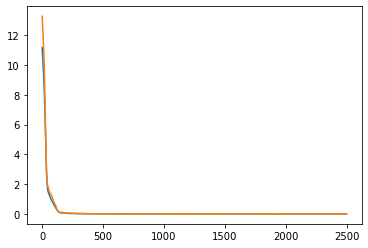

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


In [30]:
test_predictions = model0.predict(X_test).flatten()
test_results = pd.DataFrame(data = {'Test Predictions':test_predictions,'Actuals':y_test})
test_results

2/2 [==============================] - 0s 4ms/step


,Test Predictions,Actuals
0,3.774686,3.836900
1,3.808802,3.820900
2,3.788104,3.833900
3,3.817142,3.732600
4,3.730568,3.872500
5,3.847852,3.982300
6,3.953264,4.009200
7,3.966542,3.820500
8,3.825196,3.914200
9,3.892613,3.793000


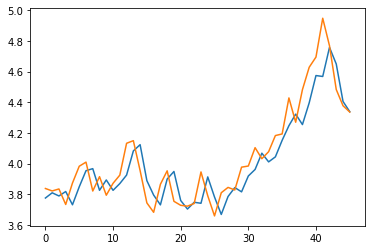

In [31]:
plt.plot(test_results['Test Predictions'])
plt.plot(test_results['Actuals'])

In [32]:
# Evaluating 
print("MSE:",metrics.mean_squared_error (y_test,test_predictions))
print("RMSE:", np.sqrt(metrics.mean_squared_error (y_test,test_predictions)))
print("RRMSE:",np.sqrt(metrics.mean_squared_error (y_test,test_predictions))/model_data['USDPLN Close'].mean())
print("MAE:", metrics.mean_absolute_error (y_test, test_predictions))
print("RMAE:", metrics.mean_absolute_error (y_test, test_predictions)/model_data['USDPLN Close'].mean())
print("EV:", metrics.explained_variance_score(y_test,test_predictions))

MSE: 0.016798155075958724
RMSE: 0.12960769682375628
RRMSE: 0.03682505534356911
MAE: 0.10521707327469512
RMAE: 0.029895018902294235
EV: 0.8406005006207595


In [33]:
#####################
# NEW DATA PREDICTION

In [34]:
str(pd.to_datetime(model_data[-1:].index[0]) + pd.DateOffset(months=1))[:7]

'2023-02'

In [35]:
import datetime as dt
print('Today is: '+dt.datetime.now().strftime('%Y-%m-%d')+'\nThe last month of the dataset is the month ending: '+str(pd.to_datetime(model_data[-1:].index[0]))[:7])
print('The predicted close will be for the month ending: '+str(pd.to_datetime(model_data[-1:].index[0]) + pd.DateOffset(months=1))[:7])

Today is: 2023-02-12
The last month of the dataset is the month ending: 2023-01
The predicted close will be for the month ending: 2023-02


In [37]:
new_data = model_data.copy()
new_data = new_data.to_numpy()
new_data = new_data[-WINDOW_SIZE:]
new_data = new_data.reshape(1,7,6)
preprocess(new_data)

In [38]:
yhat = model0.predict(new_data).flatten()

1/1 [==============================] - 0s 7ms/step


In [39]:
str(round(np.sqrt(metrics.mean_squared_error (y_test,test_predictions))+yhat[0],6))

'4.483161'

In [40]:
print('The predicted close for the month ending: '+str(pd.to_datetime(model_data[-1:].index[0]) + pd.DateOffset(months=1))[:7]+' is: '+str(yhat[0]))
print('The RMSE upper and lower bounds are: '+str(round(np.sqrt(metrics.mean_squared_error (y_test,test_predictions))+yhat[0],6))+', '+str(round(yhat[0] - np.sqrt(metrics.mean_squared_error (y_test,test_predictions)),6)))
print('The MAE upper and lower bounds are: '+str(round(metrics.mean_absolute_error (y_test, test_predictions)+yhat[0],6))+', '+str(round(yhat[0] - metrics.mean_absolute_error (y_test, test_predictions),6)))
print('\n\nThe RMSE extreme upper and lower bounds are: '+str(round(np.sqrt(metrics.mean_squared_error (y_test,test_predictions))*2+yhat[0],6))+', '+str(round(yhat[0] - np.sqrt(metrics.mean_squared_error (y_test,test_predictions))*2,6)))
print('The MAE extreme upper and lower bounds are: '+str(round(metrics.mean_absolute_error (y_test, test_predictions)*2+yhat[0],6))+', '+str(round(yhat[0] - metrics.mean_absolute_error (y_test, test_predictions)*2,6)))

The predicted close for the month ending: 2023-02 is: 4.353554
The RMSE upper and lower bounds are: 4.483161, 4.223946
The MAE upper and lower bounds are: 4.458771, 4.248337


The RMSE extreme upper and lower bounds are: 4.612769, 4.094338
The MAE extreme upper and lower bounds are: 4.563988, 4.14312
